In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from lifelines import KaplanMeierFitter

In [2]:
# encoders:  clean this up!!!

from feature_engine import categorical_encoders as ce
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import WoERatioCategoricalEncoder
from feature_engine.categorical_encoders import MeanCategoricalEncoder

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from paramsearch import paramsearch
from itertools import product,chain
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

ModuleNotFoundError: No module named 'paramsearch'

In [ ]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostRegressor, CatBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from category_encoders.basen import BaseNEncoder

# Load in data:

In [ ]:
df = pd.read_csv('labeled_with_all_columns.csv')
df.head()

In [ ]:
# df.dtypes
for col in df.columns:
    print(col, df[col].unique()[0:20], '\n')

In [ ]:
# numerical: 
discrete = ['time_in_hospital', 'num_lab_procedures', 
            'num_procedures', 'num_medications', 'number_outpatient', 
            'number_emergency', 'number_inpatient', 'number_diagnoses']
continuous = [col for col in df.columns if df[col].dtype!='O' 
              and col!='readmitted_target' and col not in discrete]

# may not use these columns
mixed = ['num_outpatient_buckets', 'num_emergency_buckets',
       'num_inpatient_buckets', 'num_diagnoses_buckets']

# categorical
categorical = [col for col in df.columns if df[col].dtype=='O' 
               and col not in mixed]

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))
print('There are {} mixed variables'.format(len(mixed)))

In [ ]:
df.drop(['num_outpatient_buckets', 'num_emergency_buckets',
       'num_inpatient_buckets', 'num_diagnoses_buckets',
         'lab_procedure_buckets', 
         'num_medication_buckets'], axis=1, inplace=True)

Try ordinal for age, weight and the meds that are no, yes, up and down?  also binary for no/yes columns?

Try to use the "important" features columns as whole columns and not one hot encoded.

Try KNN discrestiser, clustering and use column transformer when decided.

In [ ]:
# df.to_csv('ready_for_engineering.csv', index=False)

## encoders to revisit possibly (rare and WoE)

Maybe revisit rare encoding???  Instead of renaming some categories?

In [ ]:
# X_train = rare_encoder.transform(X_train)
# X_test = rare_encoder.transform(X_test)

In [ ]:
# ohe_enc = OneHotCategoricalEncoder(top_categories=5,
#     variables=None,
#     drop_last=False)

In [ ]:
# ohe_enc.fit(X_train)

In [ ]:
# ohe_enc.encoder_dict_

In [ ]:
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

Also reviist WoE encoding?  I did like this with scaling the num columns.

In [ ]:
# woe_enc = WoERatioCategoricalEncoder(
#     encoding_method = 'woe',
#     variables=['age', 'admission_type_id', 'discharge_disposition_id',
#        'admission_source_id', 'payer_code', 'num_procedures',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
#        'number_diagnoses', 'max_glu_serum', 'insulin', 'diabetesMed'])

In [ ]:
# X_train.dtypes

In [ ]:
# X_train[['num_procedures',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 
#        'number_diagnoses']] = X_train[['num_procedures',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 
#        'number_diagnoses']].astype('O')

In [ ]:
# X_test[['num_procedures',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 
#        'number_diagnoses']] = X_test[['num_procedures',
#        'number_outpatient', 'number_emergency', 'number_inpatient', 
#        'number_diagnoses']].astype('O')

In [ ]:
# woe_enc.fit(X_train, y_train)

In [ ]:
# X_train = woe_enc.transform(X_train)
# X_test = woe_enc.transform(X_test)


## Fix for column names with XGB if using OneHotEncoding:

In [ ]:
# X_train.rename(columns={'A1Cresult_>8':'A1Cresult_Over8', 
# 'max_glu_serum_>200':'max_glu_serum_Over200',
# 'max_glu_serum_>300':'max_glu_serum_Over300'}, inplace=True)

In [ ]:
# X_test.rename(columns={'A1Cresult_>8':'A1Cresult_Over8', 
# 'max_glu_serum_>200':'max_glu_serum_Over200',
# 'max_glu_serum_>300':'max_glu_serum_Over300'}, inplace=True)

In [ ]:
# import re
# regex = re.compile(r"\[|\]|<", re.IGNORECASE)


In [ ]:
# X_train.columns = [regex.sub("_", col) if 
#               any(x in str(col) for x in set(('[', ']', '<'))) 
#               else col for col in X_train.columns.values]

In [ ]:
# X_test.columns = [regex.sub("_", col) if 
#               any(x in str(col) for x in set(('[', ']', '<'))) 
#               else col for col in X_test.columns.values]

In [ ]:
# for col in X_test.columns:
#     if col not in second_feats:
#         X_test.drop([col], axis=1, inplace=True)

# Start Domain Knowledge Feature Engineering:

Ok - I am going to feature engineer some of these columns and then combine some of the values as well.

I will consider reducing some of the patient encounters that are duplicates.

I then will RareEncode and OneHotEncode the categorical columns  and OrdinalLabelEncode the numerical bucket columns (age, weight).

Then I will review model performances of RandomForest and XGBoost models with the following metrics and get the feature importances for each.
This should help with predictive power. 

Then...I will analyze results and predictions for actionable insights.

In [6]:
df = pd.read_csv('ready_for_engineering.csv')
df.head()

encounter_id  patient_nbr             race  gender      age   weight  \
0       2278392      8222157        Caucasian  Female   [0-10)  unknown   
1        149190     55629189        Caucasian  Female  [10-20)  unknown   
2         64410     86047875  AfricanAmerican  Female  [20-30)  unknown   
3        500364     82442376        Caucasian    Male  [30-40)  unknown   
4         16680     42519267        Caucasian    Male  [40-50)  unknown   

  admission_type_id discharge_disposition_id admission_source_id  \
0           Unknown                  Unknown            Referral   
1         Emergency                     Home       EmergencyRoom   
2         Emergency                     Home       EmergencyRoom   
3         Emergency                     Home       EmergencyRoom   
4         Emergency                     Home       EmergencyRoom   

   time_in_hospital  ...    insulin glyburide-metformin  glipizide-metformin  \
0                 1  ...       None                None                 None   
1                 3  ...  Increased                None                 None   
2                 2  ...       None                None                 None   
3                 2  ...  Increased                None                 None   
4                 1  ...  No Change                None                 None   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                      None                     None                    None   
1                      None                     None                    None   
2                      None                     None                    None   
3                      None                     None                    None   
4                      None                     None                    None   

   change  diabetesMed readmitted readmitted_target  
0      No           No         NO                 0  
1     Yes          Yes        >30                 1  
2      No          Yes         NO                 0  
3     Yes          Yes         NO                 0  
4     Yes          Yes         NO                 0  

[5 rows x 51 columns]

In [7]:
categorical = df.select_dtypes(include=['O'])
numeric = df.select_dtypes(exclude=['O'])
display(categorical.columns)
display(numeric.columns)

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Index(['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted_target'],
      dtype='object')

In [8]:
# 1) the percentage of encounters per category
# 2) the average readmissions per category

def find_avg_readmits_per_category(df, col):

    total_encounters = len(df)

    
    temp_df = pd.Series(df[col].value_counts() / total_encounters).reset_index()
    temp_df.columns = [col, 'percent_encounters']

    
    temp_df = temp_df.merge(df.groupby([col])['readmitted_target'].mean().reset_index(),
                            on=col,
                            how='left')

    return temp_df

In [9]:
# plot the percent of encouters and avg readmits for each value in category

def plot_values(df, col):
    
    fig, ax = plt.subplots(figsize=(8, 4))
    plt.xticks(df.index, df[col], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["percent_encounters"], color='lightgrey')
    ax2.plot(df.index, df["readmitted_target"], color='purple', 
             label='readmissions')
    ax.axhline(y=0.05, color='red')
    ax.set_ylabel('Percentage of Encounters')
    ax.set_xlabel(col)
    ax2.set_ylabel('Percent Average Readmissions')
    plt.show()

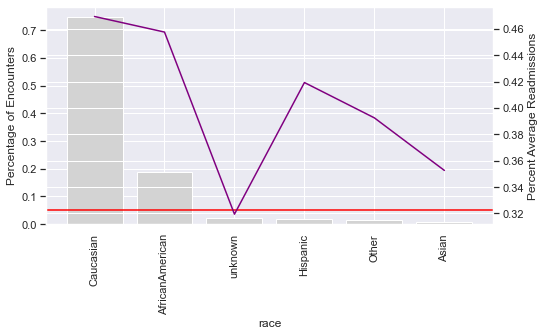

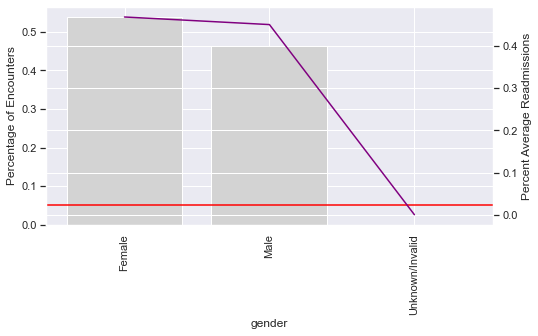

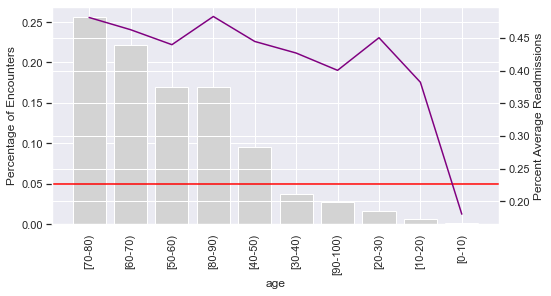

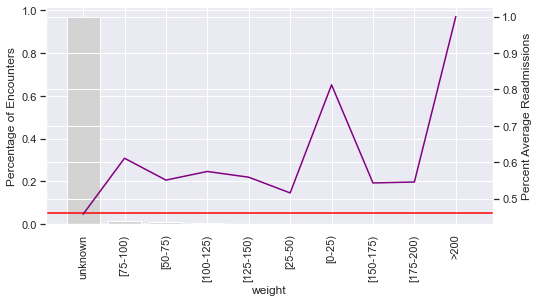

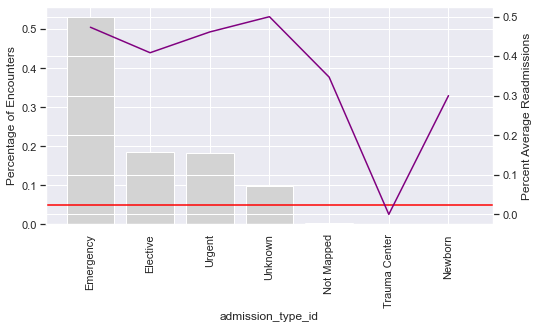

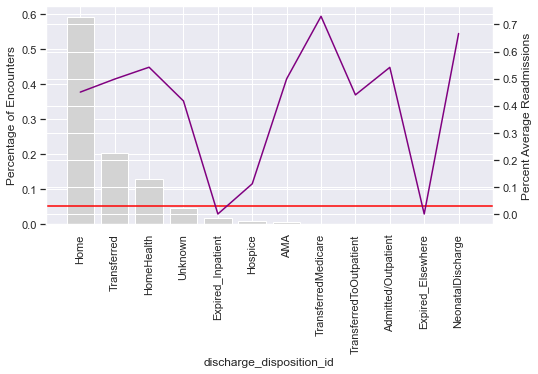

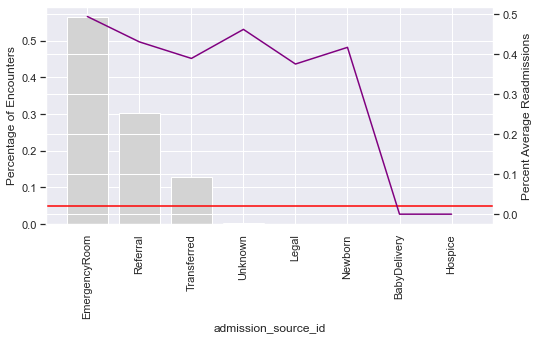

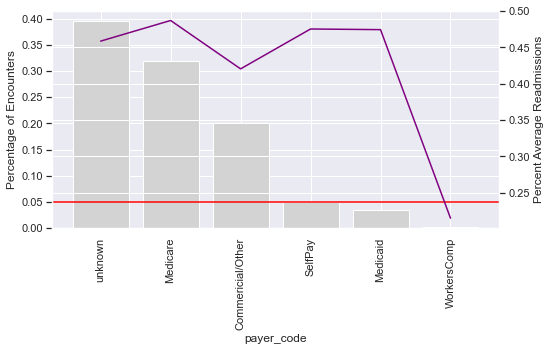

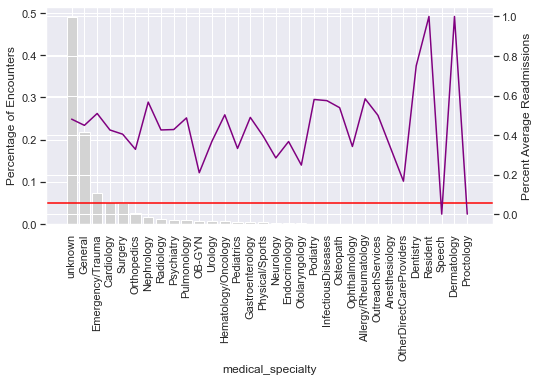

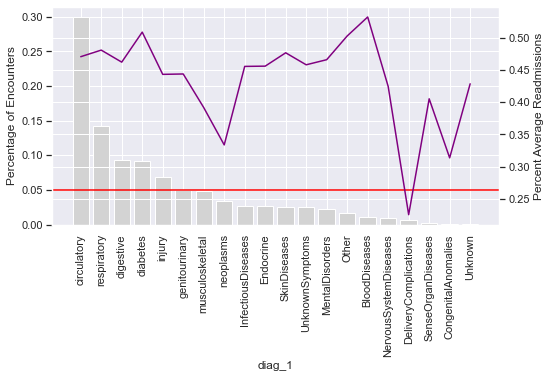

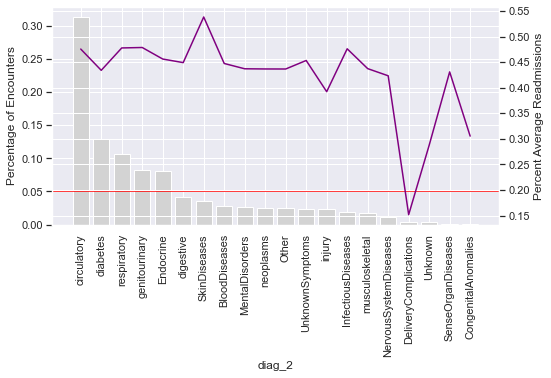

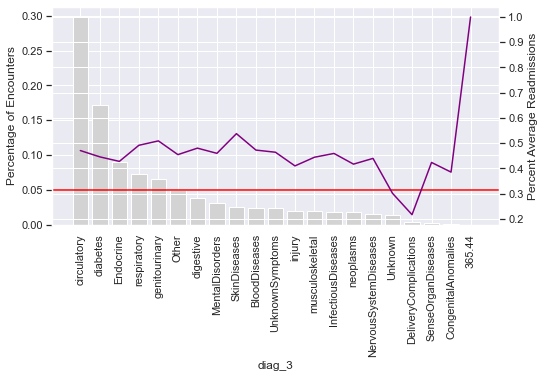

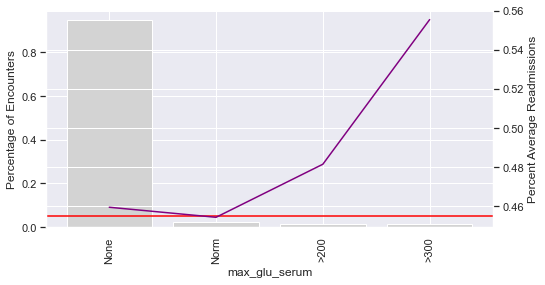

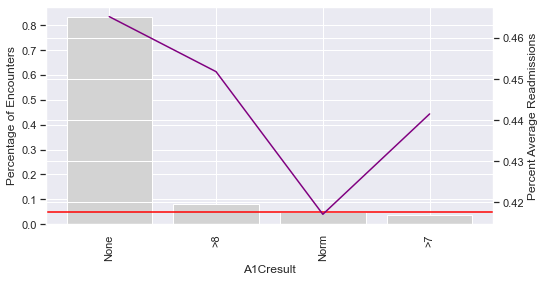

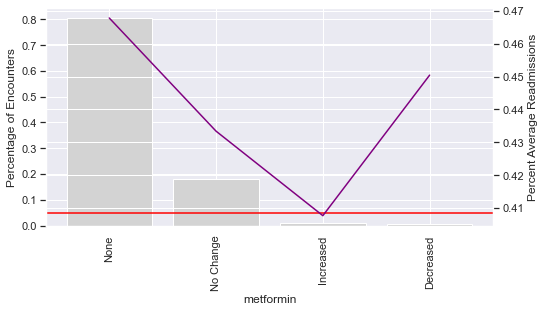

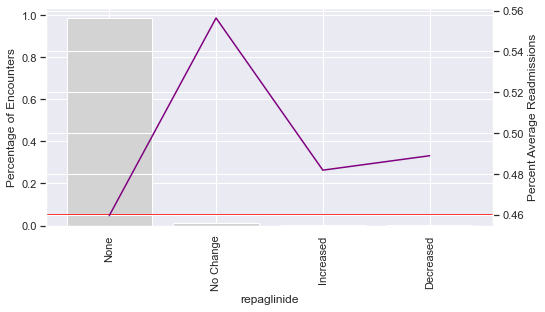

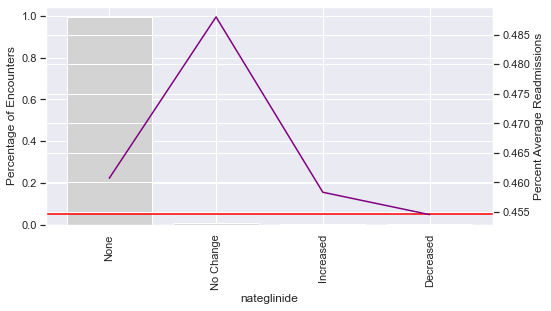

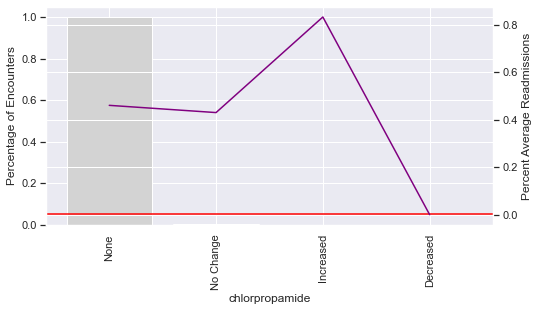

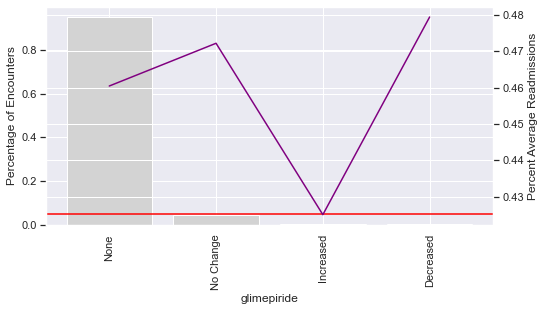

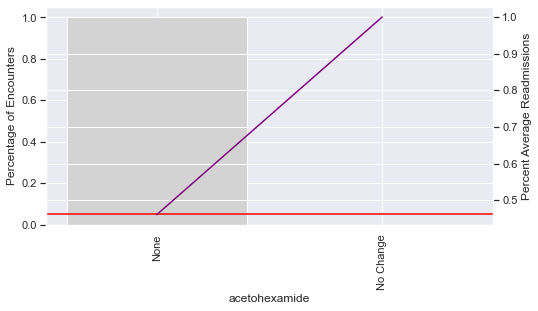

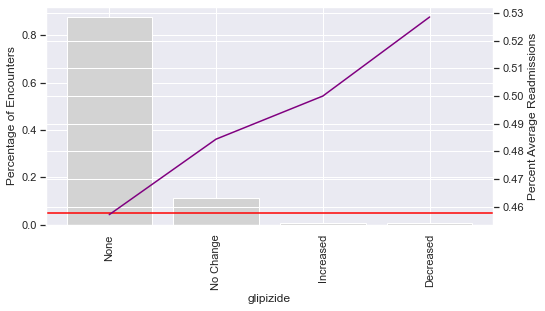

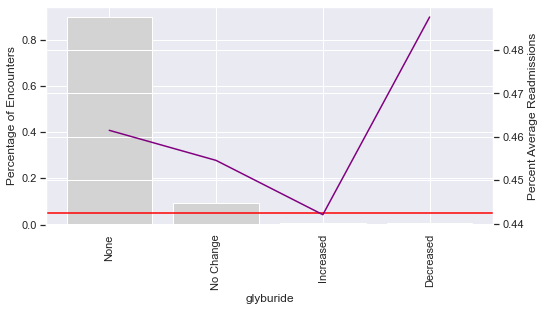

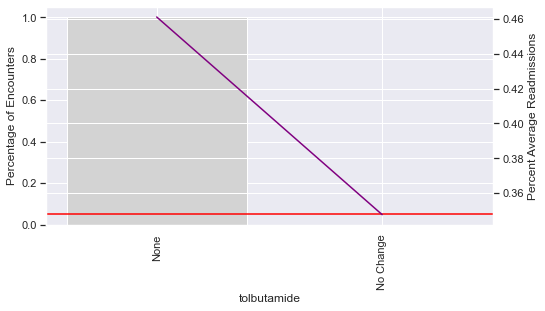

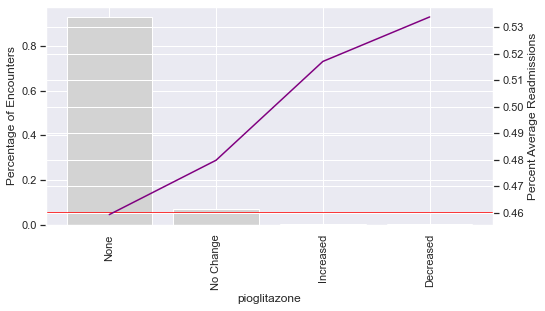

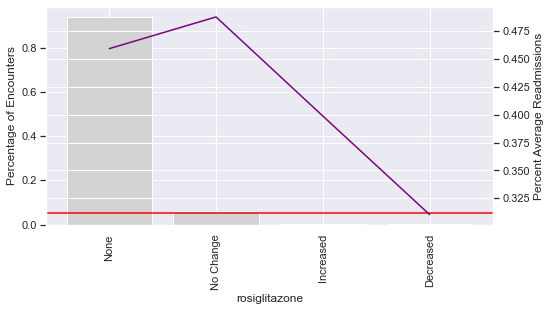

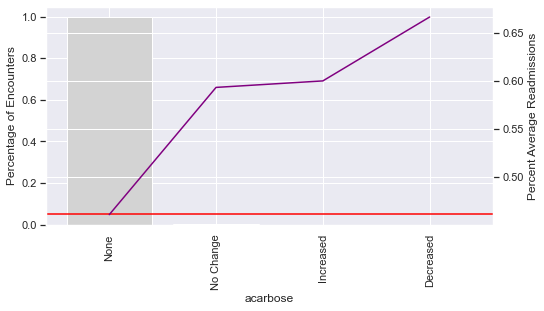

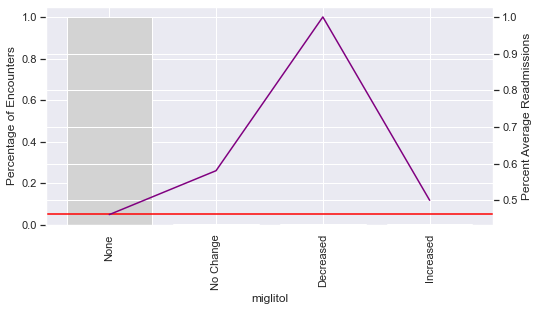

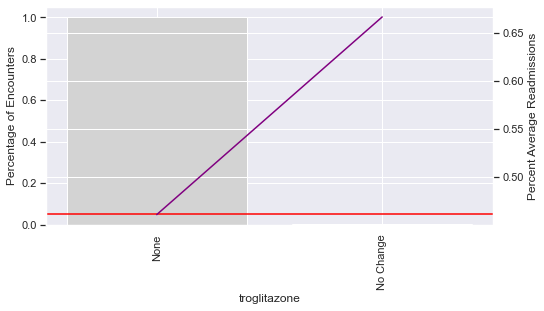

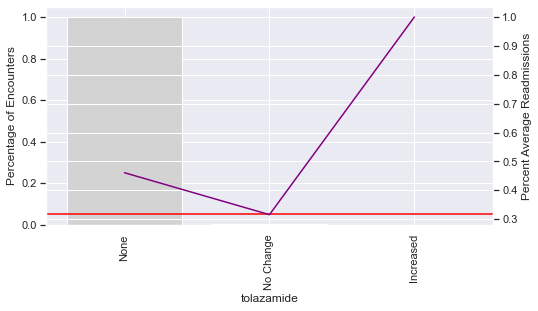

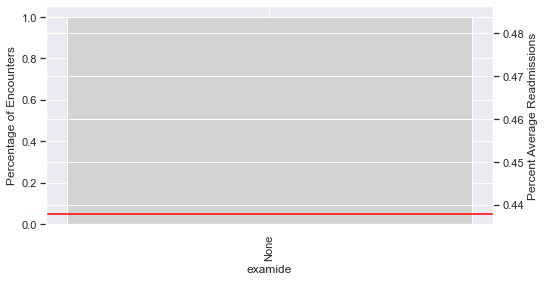

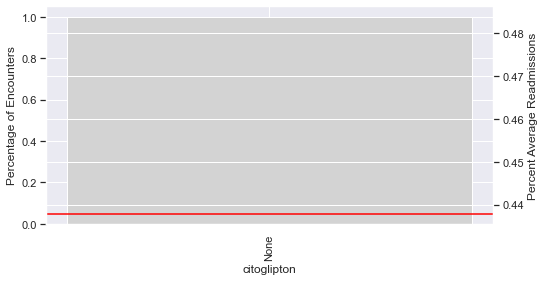

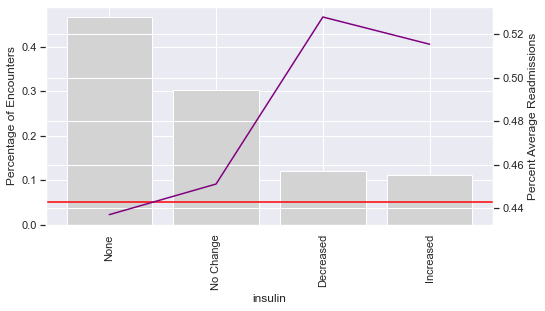

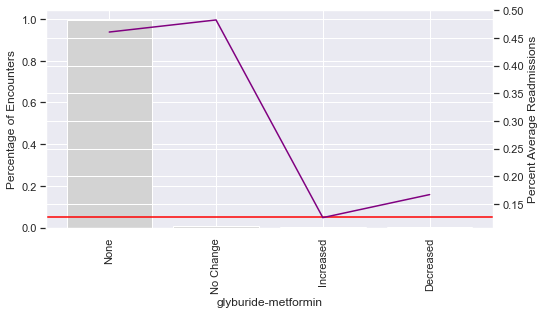

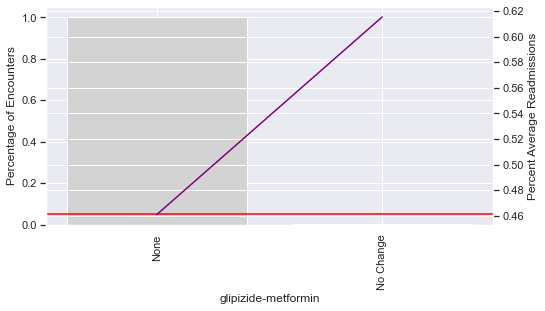

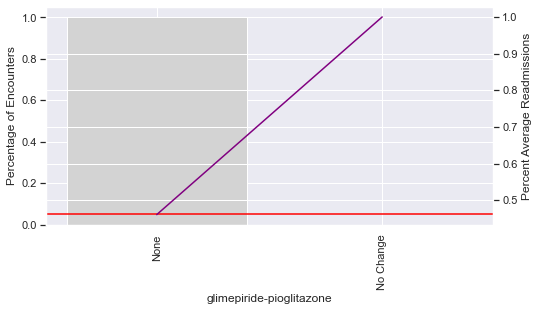

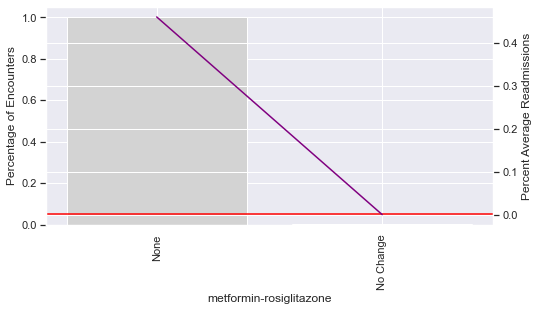

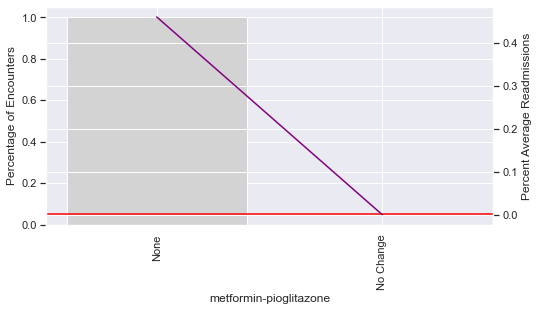

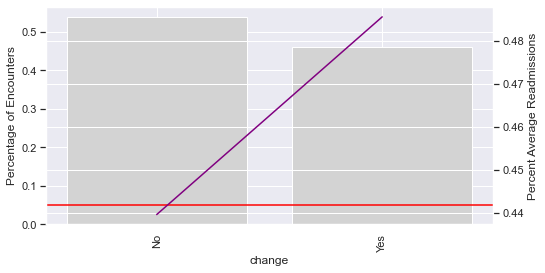

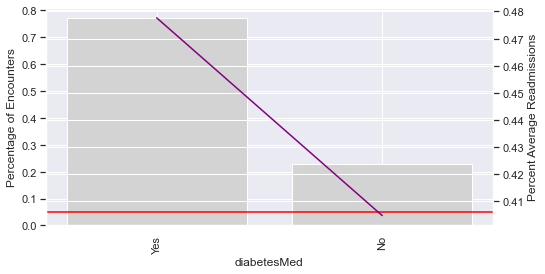

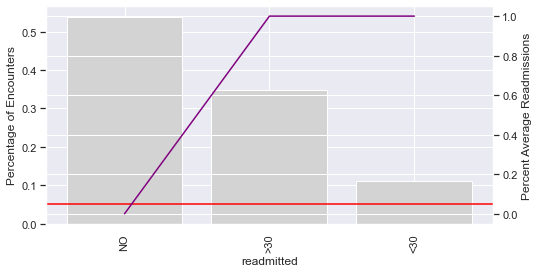

In [10]:
# loop through and plot the rest
for col in categorical:
    if col !=['readmitted', 'readmitted_target']:
        temp_df = find_avg_readmits_per_category(df, col)
        plot_values(temp_df, col)

These are why I liked the rare encoding categories!

## Treatments:

Examide and citoglipton only have encounters in "None" so I will drop those columns as they have zero significance.

In [11]:
df.drop(['examide','citoglipton'],axis=1,inplace=True)

In [12]:
treatments = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 
        'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# except insulin because they have encounters in all 4 categories 
# (I still make a temp column to include insulin in treatment counts column!)

In [13]:
for col in treatments:
    print(f'{col}:  \n {df[col].value_counts()}\n')

metformin:  
 None         81778
No Change    18346
Increased     1067
Decreased      575
Name: metformin, dtype: int64

repaglinide:  
 None         100227
No Change      1384
Increased       110
Decreased        45
Name: repaglinide, dtype: int64

nateglinide:  
 None         101063
No Change       668
Increased        24
Decreased        11
Name: nateglinide, dtype: int64

chlorpropamide:  
 None         101680
No Change        79
Increased         6
Decreased         1
Name: chlorpropamide, dtype: int64

glimepiride:  
 None         96575
No Change     4670
Increased      327
Decreased      194
Name: glimepiride, dtype: int64

acetohexamide:  
 None         101765
No Change         1
Name: acetohexamide, dtype: int64

glipizide:  
 None         89080
No Change    11356
Increased      770
Decreased      560
Name: glipizide, dtype: int64

glyburide:  
 None         91116
No Change     9274
Increased      812
Decreased      564
Name: glyburide, dtype: int64

tolbutamide:  
 None      

In [14]:
df.insulin.value_counts()

None         47383
No Change    30849
Decreased    12218
Increased    11316
Name: insulin, dtype: int64

OK - so for all of the "treatment" columns the majority of the encounters fall into only one category, or majority fall into the "None" or "No Change" 

- No Change, Increased/Decreased can combine to "On"
- These can all be combined to one column = "total treatments"

In [15]:
for col in df.columns:
    if col in treatments:
        df[col] = df[col].apply(lambda x: '0' if x == "None" else 1).astype('int64')

In [16]:
df.metformin.value_counts()

0    81778
1    19988
Name: metformin, dtype: int64

In [17]:
df.tolbutamide.value_counts()

0    101743
1        23
Name: tolbutamide, dtype: int64

In [18]:
df['insulin_new'] = df['insulin'].apply(lambda x: 0 if x == "None" else 1)
# df['metformin_new'] = df['metformin'].apply(lambda x: 0 if x == "None" else 1)

In [19]:
treatments = ['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'insulin_new', 
              'rosiglitazone', 
        'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Here I add the temp insulin column for the total treatments column

Make column for total number of treatments for each encounter.

In [20]:
df['total_treatments'] = np.zeros((len(df['repaglinide'])))
for col in treatments:
    df['total_treatments'] += df[col]
#     print(col)

Loop if dropping individual treatment columns.

In [21]:
# for col in df.columns:
#     if col in treatments:
#         df.drop([col], axis=1, inplace=True)

In [22]:
# drop the temp insulin column:
df.drop(['insulin_new'], axis=1, inplace=True)

In [23]:
df.head()

encounter_id  patient_nbr             race  gender      age   weight  \
0       2278392      8222157        Caucasian  Female   [0-10)  unknown   
1        149190     55629189        Caucasian  Female  [10-20)  unknown   
2         64410     86047875  AfricanAmerican  Female  [20-30)  unknown   
3        500364     82442376        Caucasian    Male  [30-40)  unknown   
4         16680     42519267        Caucasian    Male  [40-50)  unknown   

  admission_type_id discharge_disposition_id admission_source_id  \
0           Unknown                  Unknown            Referral   
1         Emergency                     Home       EmergencyRoom   
2         Emergency                     Home       EmergencyRoom   
3         Emergency                     Home       EmergencyRoom   
4         Emergency                     Home       EmergencyRoom   

   time_in_hospital  ... glyburide-metformin glipizide-metformin  \
0                 1  ...                   0                   0   
1                 3  ...                   0                   0   
2                 2  ...                   0                   0   
3                 2  ...                   0                   0   
4                 1  ...                   0                   0   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                         0                        0                       0   
1                         0                        0                       0   
2                         0                        0                       0   
3                         0                        0                       0   
4                         0                        0                       0   

   change  diabetesMed  readmitted readmitted_target total_treatments  
0      No           No          NO                 0              0.0  
1     Yes          Yes         >30                 1              1.0  
2      No          Yes          NO                 0              1.0  
3     Yes          Yes          NO                 0              1.0  
4     Yes          Yes          NO                 0              2.0  

[5 rows x 50 columns]

## A1C and Blood Sugar:

AIC > 6.4 implies that the patient has diabetes. 

Therefore, considered values greater than 7 and 8 together.

Norm and None: Norm implies the values in the normal range ; None implies no test conducted

In [24]:
df.A1Cresult.unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [25]:
df.A1Cresult.value_counts(normalize=True)

None    0.832773
>8      0.080734
Norm    0.049034
>7      0.037458
Name: A1Cresult, dtype: float64

In [26]:
df['A1Cresult'].replace({'>7':'HighRisk', '>8': 'HighRisk'}, inplace=True)

A normal A1C level is below 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or more indicates diabetes. Within the 5.7% to 6.4% prediabetes range, the higher your A1C, the greater your risk is for developing type 2 diabetes.



In [27]:
df['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [28]:
df.max_glu_serum.value_counts(normalize=True)

None    0.947468
Norm    0.025519
>200    0.014592
>300    0.012421
Name: max_glu_serum, dtype: float64

A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal. A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes. A reading between 140 and 199 mg/dL (7.8 mmol/L and 11.0 mmol/L) indicates prediabetes. > 300 is dangerous!

In [29]:
df['max_glu_serum'].replace({'>300':'HasDiabetes', '>200': 'HasDiabetes'}, inplace=True)

If changing A1C and max_glu_serum to binary:

In [30]:
# df['A1C_result'] = df['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )

In [31]:
# df['A1C_result'] = df['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
# df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
# df.drop(['A1Cresult'], axis=1, inplace=True)

## Weight and EncounterID

Weight encounters are basically all unknown - can probably drop this and encounter_id too.

In [32]:
df.weight.value_counts()

unknown      98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [33]:
df.drop(['encounter_id', 'weight'], axis=1, inplace=True)

## Gender, Med Change and Diabetes Meds:

In [34]:
df.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Drop the 3 unknown gender encounters.

In [35]:
df.gender.replace({'Unknown/Invalid':None}, inplace=True)

In [36]:
df.dropna(axis=0, inplace=True)

In [37]:
df.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

If changing gender to binary:

In [38]:
# df['gender'] = df['gender'].apply(lambda x: 0 if x == "Male" else 1)

Change and diabetes Meds prescribed can be binary encoded if needed.

In [39]:
df.change.value_counts()

No     54754
Yes    47009
Name: change, dtype: int64

In [40]:
df.diabetesMed.value_counts()

Yes    78361
No     23402
Name: diabetesMed, dtype: int64

In [41]:
# binary_cols = ['change', 'diabetesMed']

In [42]:
# for col in df.columns:
#     if col in binary_cols:
#         df[col].replace({'No':0, 'Yes':1}, inplace=True)

## Race and Age:

In [43]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', 'unknown', 'Other', 'Asian',
       'Hispanic'], dtype=object)

In [44]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

This is one of the categorical columns that rare encoding would be beneficial.  Along with the diagnoses columns and admission/discharge types.

In [45]:
df['race'].replace({'unknown': 'Other', 'Hispanic': 'Other', 
                    'Asian': 'Other',}, inplace=True)

In [46]:
df.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               6454
Name: race, dtype: int64

Age can be encoded ordinaly or by replacing the buckets with the median bucket age.

In [47]:
df.age.value_counts()
df.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [48]:
df.age.replace({'[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35, 
                '[40-50)': 45, '[50-60)': 55,
       '[60-70)': 65, '[70-80)': 75, '[80-90)': 85, '[90-100)': 95}, inplace=True)

In [49]:
df.age.value_counts()

75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

## Payer Codes:

Payer code can be manually or rare encoded, or dropped.  Dropped because I would like to say that the insurance type should not matter in care, but for now, we will keep it to see what the modeling says!

In [50]:
df.payer_code.value_counts()

unknown              40255
Medicare             32439
Commericial/Other    20395
SelfPay               5007
Medicaid              3532
WorkersComp            135
Name: payer_code, dtype: int64

In [51]:
df['payer_code'].replace({'unknown': 'Unknown_Other', 'SelfPay': 'Unknown_Other', 
        'Medicaid': 'Unknown_Other', 'WorkersComp': 'Unknown_Other'}, inplace=True)

In [52]:
df.payer_code.value_counts()

Unknown_Other        48929
Medicare             32439
Commericial/Other    20395
Name: payer_code, dtype: int64

In [53]:
# df.drop(['payer_code'], axis=1, inplace=True)

In [54]:
df.head()

patient_nbr             race  gender  age admission_type_id  \
0      8222157        Caucasian  Female    5           Unknown   
1     55629189        Caucasian  Female   15         Emergency   
2     86047875  AfricanAmerican  Female   25         Emergency   
3     82442376        Caucasian    Male   35         Emergency   
4     42519267        Caucasian    Male   45         Emergency   

  discharge_disposition_id admission_source_id  time_in_hospital  \
0                  Unknown            Referral                 1   
1                     Home       EmergencyRoom                 3   
2                     Home       EmergencyRoom                 2   
3                     Home       EmergencyRoom                 2   
4                     Home       EmergencyRoom                 1   

      payer_code medical_specialty  ...  glyburide-metformin  \
0  Unknown_Other        Pediatrics  ...                    0   
1  Unknown_Other           unknown  ...                    0   
2  Unknown_Other           unknown  ...                    0   
3  Unknown_Other           unknown  ...                    0   
4  Unknown_Other           unknown  ...                    0   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                    0                         0                        0   
1                    0                         0                        0   
2                    0                         0                        0   
3                    0                         0                        0   
4                    0                         0                        0   

   metformin-pioglitazone  change diabetesMed readmitted readmitted_target  \
0                       0      No          No         NO                 0   
1                       0     Yes         Yes        >30                 1   
2                       0      No         Yes         NO                 0   
3                       0     Yes         Yes         NO                 0   
4                       0     Yes         Yes         NO                 0   

   total_treatments  
0               0.0  
1               1.0  
2               1.0  
3               1.0  
4               2.0  

[5 rows x 48 columns]

## Diagnoses Columns:

These can be manually or rare encoded.  Also, unsure if I want to keep all three.

In [55]:
df.diag_3.unique()

array(['Unknown', 'Endocrine', 'Other', 'circulatory', 'diabetes',
       'InfectiousDiseases', 'respiratory', 'injury', 'neoplasms',
       'genitourinary', 'musculoskeletal', 'UnknownSymptoms', 'digestive',
       'SkinDiseases', 'MentalDisorders', 'CongenitalAnomalies',
       'NervousSystemDiseases', 'SenseOrganDiseases',
       'DeliveryComplications', 'BloodDiseases', '365.44'], dtype=object)

Somehow I missed one label in diag_3.

In [56]:
df.diag_3.replace({'365.44' : 'SenseOrganDiseases'}, inplace=True)

In [57]:
df.diag_1.value_counts()

circulatory              30436
respiratory              14423
digestive                 9475
diabetes                  9347
injury                    6972
genitourinary             5117
musculoskeletal           4957
neoplasms                 3433
InfectiousDiseases        2768
Endocrine                 2702
SkinDiseases              2614
UnknownSymptoms           2539
MentalDisorders           2262
Other                     1645
BloodDiseases             1103
NervousSystemDiseases      947
DeliveryComplications      687
SenseOrganDiseases         264
CongenitalAnomalies         51
Unknown                     21
Name: diag_1, dtype: int64

In [58]:
df['diag_1'].replace({'genitourinary': 'Other', 'musculoskeletal': 'Other', 
        'neoplasms': 'Other', 'InfectiousDiseases': 'Other', 
            'Endocrine': 'Other', 'SkinDiseases': 'Other', 
    'BloodDiseases': 'Other', 'UnknownSymptoms': 'Other', 
    'MentalDisorders': 'Other', 'BloodDiseases': 'Other', 
    'NervousSystemDiseases': 'Other', 'DeliveryComplications': 'Other', 
        'SenseOrganDiseases': 'Other','CongenitalAnomalies': 'Other', 
                      'Unknown': 'Other', }, inplace=True)

In [59]:
df.diag_1.value_counts()

Other          31110
circulatory    30436
respiratory    14423
digestive       9475
diabetes        9347
injury          6972
Name: diag_1, dtype: int64

In [60]:
df.diag_2.value_counts()

circulatory              31880
diabetes                 13161
respiratory              10895
genitourinary             8376
Endocrine                 8223
digestive                 4170
SkinDiseases              3670
BloodDiseases             2926
MentalDisorders           2657
neoplasms                 2547
Other                     2536
UnknownSymptoms           2434
injury                    2426
InfectiousDiseases        1931
musculoskeletal           1764
NervousSystemDiseases     1126
DeliveryComplications      415
Unknown                    358
SenseOrganDiseases         160
CongenitalAnomalies        108
Name: diag_2, dtype: int64

In [61]:
df['diag_2'].replace({'genitourinary': 'Other', 'musculoskeletal': 'Other', 
        'neoplasms': 'Other', 'InfectiousDiseases': 'Other', 
            'Endocrine': 'Other', 'SkinDiseases': 'Other', 
    'BloodDiseases': 'Other', 'UnknownSymptoms': 'Other', 
    'MentalDisorders': 'Other', 'BloodDiseases': 'Other', 
    'NervousSystemDiseases': 'Other', 'DeliveryComplications': 'Other', 
        'SenseOrganDiseases': 'Other','CongenitalAnomalies': 'Other', 
                      'Unknown': 'Other', }, inplace=True)

In [62]:
df.diag_2.value_counts()

Other          39231
circulatory    31880
diabetes       13161
respiratory    10895
digestive       4170
injury          2426
Name: diag_2, dtype: int64

In [63]:
df.diag_3.value_counts()

circulatory              30305
diabetes                 17504
Endocrine                 9151
respiratory               7358
genitourinary             6680
Other                     5057
digestive                 3930
MentalDisorders           3136
SkinDiseases              2607
BloodDiseases             2490
UnknownSymptoms           2374
injury                    1945
musculoskeletal           1915
InfectiousDiseases        1861
neoplasms                 1856
NervousSystemDiseases     1503
Unknown                   1423
DeliveryComplications      309
SenseOrganDiseases         263
CongenitalAnomalies         96
Name: diag_3, dtype: int64

In [64]:
df['diag_3'].replace({'genitourinary': 'Other', 'musculoskeletal': 'Other', 
        'neoplasms': 'Other', 'InfectiousDiseases': 'Other', 
            'Endocrine': 'Other', 'SkinDiseases': 'Other', 
    'BloodDiseases': 'Other', 'UnknownSymptoms': 'Other', 
    'MentalDisorders': 'Other', 'BloodDiseases': 'Other', 
    'NervousSystemDiseases': 'Other', 'DeliveryComplications': 'Other', 
        'SenseOrganDiseases': 'Other','CongenitalAnomalies': 'Other', 
                      'Unknown': 'Other', }, inplace=True)

In [65]:
df.diag_3.value_counts()

Other          40721
circulatory    30305
diabetes       17504
respiratory     7358
digestive       3930
injury          1945
Name: diag_3, dtype: int64

Or drop 2 and 3?

In [66]:
# df.drop(['diag_2', 'diag_3'], axis=1, inplace=True)

## Admission Type/Source:

## Admissions, Discharge Disp. and Medical Specialty:

In [67]:
df.admission_type_id.value_counts()

Emergency        53988
Elective         18868
Urgent           18480
Unknown          10076
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type_id, dtype: int64

This can be grouped or rare encoded, or just look at ER admissions vs "other."

In [68]:
df['admission_type_id'].replace({'Elective': 'Other', 'Urgent': 'Other', 
        'Unknown': 'Other', 'Not Mapped': 'Other', 'Trauma Center': 'Other',
        'Newborn': 'Other'}, inplace=True)

Could also make this binary if needed.

In [69]:
# df.admission_type_id = df.admission_type_id.apply(lambda x: 0 if x=='Emergency' else 1)

In [70]:
df.admission_type_id.value_counts()

Emergency    53988
Other        47775
Name: admission_type_id, dtype: int64

In [71]:
df.admission_source_id.value_counts()

EmergencyRoom    57492
Referral         30855
Transferred      13095
Unknown            286
Legal               16
Newborn             12
BabyDelivery         5
Hospice              2
Name: admission_source_id, dtype: int64

I don't feel like admission source is going to give any extra information than admission type so I will drop it.

I don't feel like admission source is going to give any extra information than admission type because the majority of the encounters are also ER, so I will drop it.

In [72]:
df.discharge_disposition_id.value_counts()

Home                       60232
Transferred                20677
HomeHealth                 13010
Unknown                     4680
Expired_Inpatient           1642
Hospice                      771
AMA                          623
TransferredMedicare           63
TransferredToOutpatient       25
Admitted/Outpatient           24
Expired_Elsewhere             10
NeonatalDischarge              6
Name: discharge_disposition_id, dtype: int64

This could be grouped or rare encoded.  I will also drop expired patients because they will not be readmitted.

In [73]:
df['discharge_disposition_id'].replace({'Unknown': 'Other', 'Expired_Inpatient': None, 
        'Hospice': 'Other', 'AMA': 'Other', 'TransferredMedicare': 'Transferred',
        'TransferredToOutpatient': 'Transferred', 'Admitted/Outpatient': 'Other',
     'Expired_Elsewhere': None, 'NeonatalDischarge': 'Other'}, inplace=True)

In [74]:
df.dropna(axis=0, inplace=True)

In [75]:
df.discharge_disposition_id.value_counts()

Home           60232
Transferred    20765
HomeHealth     13010
Other           6104
Name: discharge_disposition_id, dtype: int64

In [76]:
# df.discharge_disposition_id = df.discharge_disposition_id.apply(lambda x: 0 if x=='Home' 
#                                 else 1 if x=='Transferred' else 2 if x=='HomeHealth' else 3)

In [77]:
# discharge_dict = {0:'Home', 1:'Transferred', 2:'HomeHealth', 3:'Other'}

In [78]:
df.medical_specialty.unique()

array(['Pediatrics', 'unknown', 'General', 'Cardiology', 'Surgery',
       'Orthopedics', 'Gastroenterology', 'Nephrology', 'Psychiatry',
       'Emergency/Trauma', 'Pulmonology', 'OB-GYN', 'Hematology/Oncology',
       'Otolaryngology', 'Endocrinology', 'Urology', 'Neurology',
       'Radiology', 'Podiatry', 'Ophthalmology', 'Physical/Sports',
       'InfectiousDiseases', 'Anesthesiology', 'Allergy/Rheumatology',
       'Dentistry', 'Osteopath', 'Proctology', 'Dermatology', 'Speech',
       'OutreachServices', 'OtherDirectCareProviders', 'Resident'],
      dtype=object)

In [79]:
df.medical_specialty.value_counts(normalize=True)

unknown                     0.490825
General                     0.216630
Emergency/Trauma            0.074407
Cardiology                  0.052891
Surgery                     0.050404
Orthopedics                 0.026221
Nephrology                  0.015423
Radiology                   0.011807
Psychiatry                  0.009539
Pulmonology                 0.008551
OB-GYN                      0.007711
Urology                     0.006832
Hematology/Oncology         0.006043
Pediatrics                  0.005854
Gastroenterology            0.005494
Physical/Sports             0.003916
Neurology                   0.002028
Endocrinology               0.001269
Otolaryngology              0.001249
Podiatry                    0.000999
InfectiousDiseases          0.000529
Osteopath                   0.000380
Ophthalmology               0.000380
Allergy/Rheumatology        0.000240
OutreachServices            0.000120
Anesthesiology              0.000120
OtherDirectCareProviders    0.000050
D

The majority of the encounters are in unknown, so I don't think this is a relevant column and I will drop it.

In [80]:
# drop medical specialty and admission source
df.drop(['medical_specialty', 'admission_source_id'], axis=1, inplace=True)
# 'admission_type_id'

## Visits and Procedures:

There are 3 visit type columns --> let's combine these into one.

In [81]:
df['total_visits'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [82]:
# drop the individual visit columns
df.drop(['number_outpatient', 'number_emergency', 
         'number_inpatient'], axis=1, inplace=True)

There are 2 procedure type columns --> let's combine these into one.

In [83]:
df['total_procedures'] = df['num_procedures'] + df['num_lab_procedures'] 

In [84]:
# drop the individual procedure columns
df.drop(['num_procedures', 'num_lab_procedures'], axis=1, inplace=True)

In [85]:
df.head()

patient_nbr             race  gender  age admission_type_id  \
0      8222157        Caucasian  Female    5             Other   
1     55629189        Caucasian  Female   15         Emergency   
2     86047875  AfricanAmerican  Female   25         Emergency   
3     82442376        Caucasian    Male   35         Emergency   
4     42519267        Caucasian    Male   45         Emergency   

  discharge_disposition_id  time_in_hospital     payer_code  num_medications  \
0                    Other                 1  Unknown_Other                1   
1                     Home                 3  Unknown_Other               18   
2                     Home                 2  Unknown_Other               13   
3                     Home                 2  Unknown_Other               16   
4                     Home                 1  Unknown_Other                8   

     diag_1  ... glimepiride-pioglitazone metformin-rosiglitazone  \
0  diabetes  ...                        0                       0   
1     Other  ...                        0                       0   
2     Other  ...                        0                       0   
3     Other  ...                        0                       0   
4     Other  ...                        0                       0   

   metformin-pioglitazone change diabetesMed  readmitted  readmitted_target  \
0                       0     No          No          NO                  0   
1                       0    Yes         Yes         >30                  1   
2                       0     No         Yes          NO                  0   
3                       0    Yes         Yes          NO                  0   
4                       0    Yes         Yes          NO                  0   

   total_treatments  total_visits  total_procedures  
0               0.0             0                41  
1               1.0             0                59  
2               1.0             3                16  
3               1.0             0                45  
4               2.0             0                51  

[5 rows x 43 columns]

## Readmission Target:

Multiclass target:

There is clear class imbalance when readmissions is looked at as a multi-class target.
- The majority class is "No readmission" in this case
- The minority clases are yes readmission and then whether the readmission occurred within 30 days or after 30 days from discharge of the original encounter.

In [86]:
df['readmitted'].value_counts(normalize=True)

NO     0.531500
>30    0.355056
<30    0.113444
Name: readmitted, dtype: float64

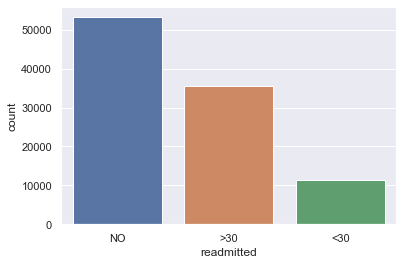

In [87]:
sns.countplot(x='readmitted', data=df)
plt.show()
# no, under 30 days, over 30 days

Binary target:

If the readmission target is approached as a binary classification problem (the two readmission categories combined into a yes category), there is no class imbalance.

In [88]:
df['readmitted_target'].value_counts(normalize=True)

0    0.5315
1    0.4685
Name: readmitted_target, dtype: float64

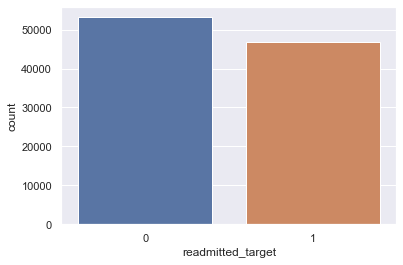

In [89]:
sns.countplot(x='readmitted_target', data=df)
plt.show()

In [90]:
df['readmitted_multi'] = df['readmitted'].replace({'NO':0, '<30':1, '>30':2})

## Check data types:

I need to make sure that the treatment categories I made binary are still labeled as category types.

In [91]:
df.dtypes

patient_nbr                   int64
race                         object
gender                       object
age                           int64
admission_type_id            object
discharge_disposition_id     object
time_in_hospital              int64
payer_code                   object
num_medications               int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                     int64
repaglinide                   int64
nateglinide                   int64
chlorpropamide                int64
glimepiride                   int64
acetohexamide                 int64
glipizide                     int64
glyburide                     int64
tolbutamide                   int64
pioglitazone                  int64
rosiglitazone                 int64
acarbose                      int64
miglitol                    

In [92]:
treatments.remove('insulin_new')
# treatments

In [93]:
for col in df.columns:
    if col in treatments:
        df[col] = df[col].astype('O')

I also don't want total treatments to be a float so I will change to integer.

In [94]:
df['total_treatments'] = df['total_treatments'].astype('int64')

In [95]:
df.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                          int64
admission_type_id           object
discharge_disposition_id    object
time_in_hospital             int64
payer_code                  object
num_medications              int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone                object
rosiglitazone               object
acarbose                    object
miglitol                    object
troglitazone        

In [96]:
df.shape

(100111, 44)

Ok looks good so far!

## Duplicate patients:

Let's take a look at patients with multiple encounters:

In [97]:
patients = df['patient_nbr']
dups = df[patients.isin(patients[patients.duplicated()])]
print(dups.shape)
dups.head()

(46158, 44)


patient_nbr       race  gender  age admission_type_id  \
12     85504905  Caucasian  Female   45         Emergency   
27    115196778  Caucasian  Female   55         Emergency   
28     41606064  Caucasian    Male   25             Other   
32     80845353  Caucasian  Female   75         Emergency   
33    114715242  Caucasian    Male   65             Other   

   discharge_disposition_id  time_in_hospital     payer_code  num_medications  \
12              Transferred                 7  Unknown_Other               15   
27                     Home                 2  Unknown_Other               11   
28                     Home                10  Unknown_Other               20   
32                     Home                 6  Unknown_Other               16   
33               HomeHealth                 5  Unknown_Other               18   

         diag_1  ... metformin-rosiglitazone metformin-pioglitazone  change  \
12  circulatory  ...                       0                      0     Yes   
27       injury  ...                       0                      0      No   
28        Other  ...                       0                      0     Yes   
32       injury  ...                       0                      0      No   
33  respiratory  ...                       0                      0      No   

   diabetesMed readmitted readmitted_target total_treatments total_visits  \
12         Yes        <30                 1                3            1   
27         Yes        >30                 1                1            0   
28         Yes        >30                 1                1            0   
32         Yes        >30                 1                1            0   
33         Yes        >30                 1                1            0   

   total_procedures readmitted_multi  
12               60                1  
27               27                2  
28               53                2  
32               27                2  
33               37                2  

[5 rows x 44 columns]

In [98]:
df.loc[df.patient_nbr==85504905]

patient_nbr       race  gender  age admission_type_id  \
12        85504905  Caucasian  Female   45         Emergency   
22077     85504905  Caucasian  Female   45         Emergency   

      discharge_disposition_id  time_in_hospital     payer_code  \
12                 Transferred                 7  Unknown_Other   
22077               HomeHealth                 9  Unknown_Other   

       num_medications       diag_1  ... metformin-rosiglitazone  \
12                  15  circulatory  ...                       0   
22077               14        Other  ...                       0   

      metformin-pioglitazone  change diabetesMed readmitted readmitted_target  \
12                         0     Yes         Yes        <30                 1   
22077                      0      No         Yes        >30                 1   

      total_treatments total_visits total_procedures readmitted_multi  
12                   3            1               60                1  
22077                1            0               47                2  

[2 rows x 44 columns]

In [99]:
df.loc[df.patient_nbr==115196778]

patient_nbr       race  gender  age admission_type_id  \
27       115196778  Caucasian  Female   55         Emergency   
777      115196778  Caucasian  Female   55         Emergency   
6954     115196778  Caucasian  Female   65         Emergency   
10851    115196778  Caucasian  Female   65         Emergency   
22586    115196778  Caucasian  Female   65         Emergency   

      discharge_disposition_id  time_in_hospital     payer_code  \
27                        Home                 2  Unknown_Other   
777                Transferred                 5  Unknown_Other   
6954                      Home                 7  Unknown_Other   
10851                     Home                 2  Unknown_Other   
22586                     Home                 7  Unknown_Other   

       num_medications       diag_1  ... metformin-rosiglitazone  \
27                  11       injury  ...                       0   
777                 16  circulatory  ...                       0   
6954                21       injury  ...                       0   
10851               13       injury  ...                       0   
22586               20  respiratory  ...                       0   

      metformin-pioglitazone  change diabetesMed readmitted readmitted_target  \
27                         0      No         Yes        >30                 1   
777                        0     Yes         Yes        >30                 1   
6954                       0      No         Yes        <30                 1   
10851                      0     Yes         Yes        >30                 1   
22586                      0     Yes         Yes        >30                 1   

      total_treatments total_visits total_procedures readmitted_multi  
27                   1            0               27                2  
777                  1            3               45                2  
6954                 1           15               49                1  
10851                2           14               33                2  
22586                2            2               48                2  

[5 rows x 44 columns]

I am unsure how I want to approach the patients with multiple encouters still.

I could drop all except the first encounter, but I have not decided.

In [100]:
# dropping encounters other than 1st visit
# df.drop_duplicates(subset= ['patient_nbr'], keep = 'first', inplace=True)
# df.shape

In [101]:
# drop it for now to encode and model
df.drop(['patient_nbr'], axis=1, inplace=True)

In [102]:
# df.to_csv('ready_for_encoding.csv', index=False)

# Train/Test Split:

I will label do seperate splits to run both binary and multi-class models.

In [103]:
df = pd.read_csv('ready_for_encoding.csv')
df.head()

race  gender  age admission_type_id discharge_disposition_id  \
0        Caucasian  Female    5             Other                    Other   
1        Caucasian  Female   15         Emergency                     Home   
2  AfricanAmerican  Female   25         Emergency                     Home   
3        Caucasian    Male   35         Emergency                     Home   
4        Caucasian    Male   45         Emergency                     Home   

   time_in_hospital     payer_code  num_medications    diag_1    diag_2  ...  \
0                 1  Unknown_Other                1  diabetes     Other  ...   
1                 3  Unknown_Other               18     Other  diabetes  ...   
2                 2  Unknown_Other               13     Other  diabetes  ...   
3                 2  Unknown_Other               16     Other  diabetes  ...   
4                 1  Unknown_Other                8     Other     Other  ...   

  metformin-rosiglitazone  metformin-pioglitazone change diabetesMed  \
0                       0                       0     No          No   
1                       0                       0    Yes         Yes   
2                       0                       0     No         Yes   
3                       0                       0    Yes         Yes   
4                       0                       0    Yes         Yes   

   readmitted  readmitted_target  total_treatments  total_visits  \
0          NO                  0                 0             0   
1         >30                  1                 1             0   
2          NO                  0                 1             3   
3          NO                  0                 1             0   
4          NO                  0                 2             0   

   total_procedures  readmitted_multi  
0                41                 0  
1                59                 2  
2                16                 0  
3                45                 0  
4                51                 0  

[5 rows x 43 columns]

In [104]:
df.shape

(100111, 43)

### Binary Split:

In [105]:
X = df.drop(['readmitted', 'readmitted_target', 'readmitted_multi'], axis=1)
y_bi = df['readmitted_target']

In [106]:
X_train, X_test, y_train_bi, y_test_bi = train_test_split(X, y_bi, 
                                    test_size=.2, random_state=42)

X_train.shape, X_test.shape

((80088, 40), (20023, 40))

In [107]:
X_train_cats, X_test_cats, y_train_bi, y_test_bi = train_test_split(X, y_bi, 
                                    test_size=.2, random_state=42)

X_train_cats.shape, X_test_cats.shape

((80088, 40), (20023, 40))

In [108]:
y_train_bi.shape, y_test_bi.shape

((80088,), (20023,))

In [109]:
# check for class imbalance
y_train_bi.value_counts(normalize=True)

0    0.531153
1    0.468847
Name: readmitted_target, dtype: float64

In [110]:
y_test_bi.value_counts(normalize=True)

0    0.532887
1    0.467113
Name: readmitted_target, dtype: float64

In [111]:
# X_train.head()
# X_train_cats.head()

### Multi-Class Split:

In [112]:
X = df.drop(['readmitted', 'readmitted_target', 'readmitted_multi'], axis=1)
y_multi = df['readmitted_multi']

In [113]:
X_train, X_test, y_train_mc, y_test_mc = train_test_split(X, y_multi, 
                                    test_size=.2, random_state=42)

X_train.shape, X_test.shape

((80088, 40), (20023, 40))

In [114]:
y_train_mc.shape, y_test_mc.shape

((80088,), (20023,))

In [115]:
# check for class imbalance
y_train_mc.value_counts(normalize=True)

0    0.531153
2    0.354897
1    0.113950
Name: readmitted_multi, dtype: float64

In [116]:
y_test_mc.value_counts(normalize=True)

0    0.532887
2    0.355691
1    0.111422
Name: readmitted_multi, dtype: float64

In [117]:
# X_train.head()

In [118]:
# for col in X_train.columns:
#     print(f'{col}:  \n {X_train[col].value_counts(normalize=True)}\n')

In [119]:
# for col in X_test.columns:
#     print(f'{col}:  \n {X_test[col].value_counts(normalize=True)}\n')

# Encoding:

I will also label the encoding sets separately for modeling.

In [120]:
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'payer_code', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'insulin', 'change', 'diabetesMed'],
      dtype='object')

In [121]:
num_cols = X_train.select_dtypes('int64').columns
num_cols

Index(['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'total_treatments', 'total_visits',
       'total_procedures'],
      dtype='object')

In [122]:
# X_train

In [123]:
num_pipe = Pipeline([
    ('scaler', 
    StandardScaler())])

In [124]:
cat_pipe = Pipeline([
    ('encoder',
        OneHotEncoder(drop='if_binary', sparse=False))])

In [125]:
preprocessing = ColumnTransformer(transformers=[
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'to...
       'metformin-pioglitazone', 'total_treatments', 'total_visits',
       'total_procedures'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'payer_code', 'diag_1', 'diag_2

In [126]:
X_train_trans = preprocessing.fit_transform(X_train)
X_test_trans = preprocessing.transform(X_test)

In [127]:
feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
# feature_names

In [128]:
num_cols = num_cols.tolist()
num_cols

['age',
 'time_in_hospital',
 'num_medications',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'total_treatments',
 'total_visits',
 'total_procedures']

In [129]:
X_cols = num_cols+feature_names
# X_cols

In [130]:
X_train = pd.DataFrame(X_train_trans,columns=X_cols)
X_test = pd.DataFrame(X_test_trans,columns=X_cols)
X_train.head()

age  time_in_hospital  num_medications  number_diagnoses  metformin  \
0 -0.051043          3.227674         5.317452          0.820820  -0.499188   
1 -2.558958          0.539380         0.620161          0.820820  -0.499188   
2 -0.051043          1.883527        -0.492356          0.303993   2.003252   
3 -1.305000         -1.140804         0.002096          0.820820  -0.499188   
4 -0.051043         -0.804767        -0.245130          0.303993   2.003252   

   repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  ...  \
0    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
1    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
2    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
3    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
4    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   

   max_glu_serum_Norm  A1Cresult_HighRisk  A1Cresult_None  A1Cresult_Norm  \
0                 0.0                 0.0             1.0             0.0   
1                 0.0                 0.0             1.0             0.0   
2                 0.0                 0.0             1.0             0.0   
3                 0.0                 0.0             1.0             0.0   
4                 0.0                 0.0             1.0             0.0   

   insulin_Decreased  insulin_Increased  insulin_No Change  insulin_None  \
0                0.0                1.0                0.0           0.0   
1                0.0                1.0                0.0           0.0   
2                0.0                0.0                0.0           1.0   
3                0.0                0.0                1.0           0.0   
4                0.0                0.0                0.0           1.0   

   change_Yes  diabetesMed_Yes  
0         1.0              1.0  
1         1.0              1.0  
2         0.0              1.0  
3         1.0              1.0  
4         0.0              1.0  

[5 rows x 69 columns]

In [133]:
X_train.describe().round(3)

age  time_in_hospital  num_medications  number_diagnoses  \
count  80088.000         80088.000        80088.000         80088.000   
mean       0.000             0.000            0.000             0.000   
std        1.000             1.000            1.000             1.000   
min       -3.813            -1.141           -1.852            -3.314   
25%       -0.678            -0.805           -0.740            -0.730   
50%       -0.051            -0.133           -0.122             0.304   
75%        0.576             0.539            0.497             0.821   
max        1.830             3.228            7.790             4.439   

       metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  \
count  80088.000    80088.000    80088.000        80088.00    80088.000   
mean       0.000        0.000       -0.000            0.00       -0.000   
std        1.000        1.000        1.000            1.00        1.000   
min       -0.499       -0.125       -0.084           -0.03       -0.233   
25%       -0.499       -0.125       -0.084           -0.03       -0.233   
50%       -0.499       -0.125       -0.084           -0.03       -0.233   
75%       -0.499       -0.125       -0.084           -0.03       -0.233   
max        2.003        7.997       11.928           33.81        4.287   

       acetohexamide  ...  max_glu_serum_Norm  A1Cresult_HighRisk  \
count      80088.000  ...           80088.000           80088.000   
mean          -0.000  ...               0.026               0.119   
std            1.000  ...               0.160               0.324   
min           -0.004  ...               0.000               0.000   
25%           -0.004  ...               0.000               0.000   
50%           -0.004  ...               0.000               0.000   
75%           -0.004  ...               0.000               0.000   
max          282.996  ...               1.000               1.000   

       A1Cresult_None  A1Cresult_Norm  insulin_Decreased  insulin_Increased  \
count       80088.000       80088.000          80088.000          80088.000   
mean            0.831           0.050              0.121              0.111   
std             0.374           0.217              0.326              0.314   
min             0.000           0.000              0.000              0.000   
25%             1.000           0.000              0.000              0.000   
50%             1.000           0.000              0.000              0.000   
75%             1.000           0.000              0.000              0.000   
max             1.000           1.000              1.000              1.000   

       insulin_No Change  insulin_None  change_Yes  diabetesMed_Yes  
count          80088.000     80088.000   80088.000        80088.000  
mean               0.303         0.465       0.465            0.773  
std                0.459         0.499       0.499            0.419  
min                0.000         0.000       0.000            0.000  
25%                0.000         0.000       0.000            1.000  
50%                0.000         0.000       0.000            1.000  
75%                1.000         1.000       1.000            1.000  
max                1.000         1.000       1.000            1.000  

[8 rows x 69 columns]

In [ ]:
# X_train.to_csv('encoded_X_train.csv', index=False)
# X_test.to_csv('encoded_X_test.csv', index=False)
# y_train_bi.to_csv('binary_y_train.csv', index=False)
# y_test_bi.to_csv('binary_y_test.csv', index=False)
# y_train_mc.to_csv('multi_y_train.csv', index=False)
# y_train_mc.to_csv('multi_y_test.csv', index=False)

In [470]:
# X_train_cats.to_csv('X_train_categories.csv', index=False)
# X_test_cats.to_csv('X_test_categories.csv', index=False)

# Modeling:

## Functions:

In [443]:
def model_test(model, X_train, y_train, X_test, y_test):
   # fit model on training data
    model.fit(X_train, y_train)
    
    # get model predictions and score on test set
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    return predictions, score

In [685]:
def get_model_performance(predictions, color, X_test, y_test):
    cfm = confusion_matrix(y_test, predictions)
    clr = classification_report(y_test, predictions, 
                    target_names = ['Not Readmitted', '< 30 days',  '> 30 days']
#                                 target_names = ['Not Readmitted', 'Readmitted']
                                )
                                           
    true_negative = cfm[0][0]
    false_positive = cfm[0][1]
    false_negative = cfm[1][0]
    true_positive = cfm[1][1]

    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    
    print(f'Confusion Matrix: \n', cfm, '\n')
    print(f'Classification Report: \n', clr, '\n')
    
    print(f'True Negative: {true_negative}')
    print(f'False Positive: {false_positive}')
    print(f'False Negative: {false_negative}')
    print(f'True Positive: {true_positive}', '\n')
    
    print (f'Precision score: {precision}')
    print (f'Recall score: {recall}')
    print (f'F1 score : {f1}')
    print (f'Accuracy score: {accuracy}')
    
    plt.figure(figsize=(13,8))
    sns.heatmap(confusion_matrix(y_test, predictions), 
            annot=True, fmt=".3f", linewidths=.5, square = True, 
                cmap = color);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = (f'Recall Score: {recall}')
    plt.title(all_sample_title, size = 15);
    
# for binary:   
# target_names = ['Not Readmitted', 'Readmitted']
# for multi:
# target_names = ['Not Readmitted', '< 30 days',  '> 30 days']
                                               

In [445]:
cmap_colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 
'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 
'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 
'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r',
'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 
'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 
'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 
'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [446]:
def get_important_feats(model, X_train):
    feature_importance = model.feature_importances_
    feat_importances = pd.Series(model.feature_importances_, 
                                 index=X_train.columns)
    feat_importances = feat_importances.nlargest(19)
    feat_importances.plot(kind='barh' , figsize=(10,10)) 
    plt.show()

## CatBoost:

In [230]:
# X_train_cats = X_train.copy()
# X_test_cats = X_train.copy()
# y_train_bi_cats = y_train_bi.copy()
# y_test_bi_cats = y_test_bi.copy()
# y_train_mc_cats = y_train_mc.copy()
# y_test_mc_cats = y_test_mc.copy()

In [488]:
cat_cats = X_train_cats.select_dtypes('O').columns
cat_cats

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'payer_code', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'insulin', 'change', 'diabetesMed'],
      dtype='object')

In [489]:
num_cats = X_train_cats.select_dtypes('int64').columns
num_cats

Index(['age', 'time_in_hospital', 'num_medications', 'number_diagnoses',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'total_treatments', 'total_visits',
       'total_procedures'],
      dtype='object')

In [325]:
# y_train_mc_cats.shape
# y_test_mc_cats.shape
# X_train_cats.shape
# X_test_cats.shape

(20023,)

In [ ]:
# params = {'depth':[3,1,2,6,4,5,7,8,9,10],
#           'iterations':[250,100,500,1000],
#           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
#           'l2_leaf_reg':[3,1,5,10,100],
#           'border_count':[32,5,10,20,50,100,200],
# #           'ctr_border_count':[50,5,10,20,100,200],
#           'thread_count':4, 
#          'loss_function':['Logloss', 'CrossEntropy']}

Below is with the binary target.

In [491]:
# evaluate the model
model = CatBoostClassifier(verbose=200, n_estimators=100,
        boosting_type='Ordered', 
                  loss_function='CrossEntropy',
                           cat_features=cat_cats)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X_train_cats, y_train_bi, 
                           scoring='recall', 
                           cv=cv, n_jobs=-1, error_score='raise')
print(f'Recall: {n_scores}')


Recall: 0.464 (0.008)


Multi-class:

In [556]:
# fit the model on the whole dataset
model = CatBoostClassifier(verbose=200, n_estimators=100,
        boosting_type='Ordered', 
                           objective='CrossEntropy',
                           custom_metric=['Recall', 'F1'])
#                           ignored_features=ignore)
#                            auto_class_weights='Balanced',
#                   loss_function ='MultiClass')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
model.fit(X_train_cats, y_train_bi, cat_features=cat_cats, 
          eval_set=(X_test_cats,
                y_test_bi), 
          use_best_model=True,
                          plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6908079	test: 0.6908729	best: 0.6908729 (0)	total: 59.2ms	remaining: 5.86s
99:	learn: 0.6512097	test: 0.6531561	best: 0.6531561 (99)	total: 5.19s	remaining: 0us

bestTest = 0.6531561085
bestIteration = 99



In [552]:
# model.get_evals_result()


In [553]:
from catboost import Pool, cv
# params = {"iterations": 100,
#           "depth": 2,
#           "loss_function": "Recall",
#           "verbose": 200}
# #           'boosting_type':'Ordered'} 
#          # 'ignored_features': ignore_cols}
cv_dataset = Pool(data=X_train_cats,
                  label=y_train_bi, cat_features=cat_cats)
# scores = cv(cv_dataset,
#             params,
#             fold_count=2, 
#             plot="True")

In [554]:
model.get_feature_importance(data=cv_dataset,
#                        type=EFstrType.FeatureImportance,
                       prettified=True,
                       thread_count=-1,
                       verbose=False)

Feature Id  Importances
0               total_visits    40.071982
1           number_diagnoses    10.592655
2   discharge_disposition_id     8.395131
3                 payer_code     7.506206
4                        age     5.476239
5            num_medications     4.287911
6                     diag_1     3.619590
7           total_procedures     3.367837
8                       race     3.224987
9              max_glu_serum     2.685911
10               diabetesMed     2.476439
11                   insulin     2.055044
12          time_in_hospital     2.035808
13         admission_type_id     1.130681
14          total_treatments     0.799367
15                 metformin     0.790632
16                 A1Cresult     0.438531
17                    gender     0.266834
18                    diag_2     0.263164
19                  acarbose     0.146501
20               repaglinide     0.142387
21                    change     0.094060
22                 glyburide     0.033866
23                  miglitol     0.032790
24              pioglitazone     0.023205
25       glyburide-metformin     0.012929
26       glipizide-metformin     0.008387
27            chlorpropamide     0.007606
28               tolbutamide     0.004858
29                tolazamide     0.002289
30             acetohexamide     0.001887
31              troglitazone     0.001538
32   metformin-rosiglitazone     0.001522
33  glimepiride-pioglitazone     0.001104
34    metformin-pioglitazone     0.000124
35                    diag_3     0.000000
36               nateglinide     0.000000
37               glimepiride     0.000000
38                 glipizide     0.000000
39             rosiglitazone     0.000000

In [530]:
print(model.get_best_score())

{'learn': {'Recall:use_weights=false;class=1': 0.462853385930309, 'Recall:use_weights=true;class=1': 0.462853385930309, 'Recall:use_weights=false;class=0': 0.7148969181221938, 'Recall:use_weights=false;class=2': 0.38169792069802627, 'Recall:use_weights=true;class=2': 0.38169792069802627, 'Recall:use_weights=true;class=0': 0.7148969181221938, 'MultiClass': 1.0181659774885221}, 'validation': {'Recall:use_weights=false;class=1': 0.4598834603316898, 'Recall:use_weights=true;class=1': 0.4598834603316898, 'Recall:use_weights=false;class=0': 0.7060918462980319, 'Recall:use_weights=false;class=2': 0.36562763268744736, 'Recall:use_weights=true;class=2': 0.36562763268744736, 'Recall:use_weights=true;class=0': 0.7060918462980319, 'MultiClass': 1.0377156150961138}}


In [526]:
preds_class = model.predict(X_test_cats)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test_cats)
# Get predicted RawFormulaVal
preds_raw = model.predict(X_test_cats, 
                          prediction_type='RawFormulaVal')

In [529]:
preds_raw

array([[ 0.9468523 , -0.9514918 ,  0.0046395 ],
       [-0.04524328, -0.12391564,  0.16915892],
       [ 0.24201709, -0.05799922, -0.18401787],
       ...,
       [ 0.64341832, -0.48396451, -0.15945381],
       [-0.3063453 ,  0.3709941 , -0.0646488 ],
       [ 0.4404941 , -0.47360522,  0.03311112]])

In [203]:
# predictions_df = pd.DataFrame()
# predictions_df['time_in_hospital'] = X_test['time_in_hospital']
# predictions_df['age'] = X_test['age']
# predictions_df['readmitted_target'] = model.predict(X_test)
# predictions_df.to_csv("Predictions.csv", index=False)

In [494]:
def get_preds(X_test_cats, cols=[]):
    predictions_df = pd.DataFrame()
    for col in cols:
        predictions_df[col] = X_test_cats[col]
    predictions_df['readmitted_target'] = model.predict(X_test_cats)
    return predictions_df

In [496]:
pred_test = get_preds(X_test_cats, ['time_in_hospital', 'age'])
pred_test

time_in_hospital  age  readmitted_target
22914                 2    5                  0
93897                 2   75                  1
149                   5   65                  0
71741                 5   65                  1
90286                 3   35                  0
...                 ...  ...                ...
32942                11   55                  1
54307                 1   55                  0
25195                 3   45                  0
6633                  5   85                  1
58183                 2   45                  0

[20023 rows x 3 columns]

In [500]:
params = {'loss_function':'Logloss', # objective function
          'eval_metric':'Recall', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 42
         }
cbc_1 = CatBoostClassifier(**params)
cbc_1.fit(X_train_cats, y_train_bi, cat_features=cat_cats, 
          eval_set=(X_test_cats, y_test_bi), # data to validate on
          use_best_model=True, # save trees created after iteration with the best validation score
          plot=True # visualization of the training
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.09356
0:	learn: 0.4909052	test: 0.4867957	best: 0.4867957 (0)	total: 62.8ms	remaining: 1m 2s
200:	learn: 0.5454473	test: 0.5246445	best: 0.5342671 (1)	total: 11.1s	remaining: 44.2s
400:	learn: 0.5675517	test: 0.5324495	best: 0.5342671 (1)	total: 22.6s	remaining: 33.7s
600:	learn: 0.5808943	test: 0.5370469	best: 0.5374746 (592)	total: 34.3s	remaining: 22.8s
800:	learn: 0.5920264	test: 0.5396130	best: 0.5410029 (710)	total: 47.1s	remaining: 11.7s
999:	learn: 0.6033183	test: 0.5420721	best: 0.5426067 (956)	total: 59.8s	remaining: 0us

bestTest = 0.5426066503
bestIteration = 956

Shrink model to first 957 iterations.


In [502]:
X_train_cats.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'time_in_hospital', 'payer_code',
       'num_medications', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'total_treatments',
       'total_visits', 'total_procedures'],
      dtype='object')

In [506]:
ignore = ['admission_type_id',
       'payer_code',
       'diag_2', 'diag_3', 
       'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

In [509]:
params = {'loss_function':'CrossEntropy',
          'eval_metric':'Recall',
          'cat_features': cat_cats,
          'verbose': 200,
          'random_seed': 42,
#           'ignored_features':ignore,
          'boosting_type' :'Ordered', 
         }
cbc_2 = CatBoostClassifier(**params)
cbc_2.fit(X_train_cats, y_train_bi,
          eval_set=(X_test_cats, y_test_bi),
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4911715	test: 0.4871164	best: 0.4871164 (0)	total: 96.9ms	remaining: 1m 36s
200:	learn: 0.4696796	test: 0.4618839	best: 0.5412167 (3)	total: 16.4s	remaining: 1m 5s
400:	learn: 0.4820634	test: 0.4738587	best: 0.5412167 (3)	total: 31s	remaining: 46.2s
600:	learn: 0.5119710	test: 0.4935315	best: 0.5412167 (3)	total: 52.9s	remaining: 35.1s
800:	learn: 0.5210791	test: 0.4991981	best: 0.5412167 (3)	total: 1m 15s	remaining: 18.9s
999:	learn: 0.5271778	test: 0.5056132	best: 0.5412167 (3)	total: 1m 38s	remaining: 0us

bestTest = 0.5412167219
bestIteration = 3

Shrink model to first 4 iterations.


In [223]:
# ignore_cols

In [365]:
params = {#'loss_function':'RMSE', # objective function
#           'eval_metric':'Recall', # metric
          'verbose': 200, # output to stdout info about training process every 200 iterations
          'random_seed': 42,
          'boosting_type':'Ordered'}
cat = CatBoostRegressor(**params, cat_features=cat_cats)
cat.fit(X_train_cats, y_train_bi_cats, cat_features=cat_cats, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Perform and visualize cross-validation:

In [370]:
# from catboost import Pool, cv
# params = {"iterations": 100,
#           "depth": 2,
#           "loss_function": "Recall",
#           "verbose": 200}
# #           'boosting_type':'Ordered'} 
#          # 'ignored_features': ignore_cols}
# cv_dataset = Pool(data=X_train_cats,
#                   label=y_train_mc_cats, cat_features=cat_cats)
# scores = cv(cv_dataset,
#             params,
#             fold_count=2, 
#             plot="True")

Or can use grid search:

In [ ]:
# cat.plot_tree(tree_idx=0, pool=cv_dataset)

In [ ]:
# for key,value in cat.get_all_params().items():
#     print(f'{key},{value}')

In [187]:
# cat.get_all_params()

In [229]:
# # make importance relative to the max importance
# feature_importance = 100.0 * (importances / importances.max())
# sorted_idx = np.argsort(feature_importance)
# feature_names = list(X_train.columns.values)
# feature_names_sort = [feature_names[indice] for indice in sorted_idx]
# pos = np.arange(sorted_idx.shape[0]) + .5
# print ('Top 6 features are: ')
# for feature in feature_names_sort[::-1][:6]:
#     print (feature)

Top 6 features are: 
total_procedures
num_medications
time_in_hospital
age
diag_1
number_diagnoses


In [ ]:
# plt.figure(figsize=(12, 10))
# plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, feature_names_sort)
# plt.title('Relative Feature Importance', fontsize=20)
# plt.show()

## Multi-class baseline models:

In [668]:
xgb = XGBClassifier()
decision = DecisionTreeClassifier(class_weight='balanced')
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
forest = RandomForestClassifier(class_weight='balanced')

In [286]:
X_train

age  time_in_hospital  num_medications  number_diagnoses  \
0     -0.051043          3.227674         5.317452          0.820820   
1     -2.558958          0.539380         0.620161          0.820820   
2     -0.051043          1.883527        -0.492356          0.303993   
3     -1.305000         -1.140804         0.002096          0.820820   
4     -0.051043         -0.804767        -0.245130          0.303993   
...         ...               ...              ...               ...   
80083  0.575936          0.539380         0.249322          0.820820   
80084 -0.678021         -0.804767         0.372935         -1.246489   
80085 -0.051043         -0.804767         0.249322          0.820820   
80086 -0.051043          1.211454         1.732677          0.820820   
80087  1.202915         -0.468730        -0.615969         -0.729662   

       total_treatments  total_visits  total_procedures  race_AfricanAmerican  \
0              0.882818     -0.521816          1.353330                   0.0   
1             -0.203068     -0.521816          1.454523                   0.0   
2             -0.203068     -0.085240         -0.215158                   1.0   
3              0.882818      1.224488         -0.316351                   0.0   
4             -0.203068     -0.085240          0.341402                   0.0   
...                 ...           ...               ...                   ...   
80083         -0.203068     -0.521816          0.442595                   0.0   
80084          1.968704     -0.085240          0.391999                   0.0   
80085         -0.203068      1.661064         -0.063369                   0.0   
80086         -1.288954     -0.521816          1.353330                   0.0   
80087         -0.203068      0.351336         -1.024700                   0.0   

       race_Caucasian  race_Other  ...  glimepiride-pioglitazone_0  \
0                 1.0         0.0  ...                         1.0   
1                 1.0         0.0  ...                         1.0   
2                 0.0         0.0  ...                         1.0   
3                 1.0         0.0  ...                         1.0   
4                 1.0         0.0  ...                         1.0   
...               ...         ...  ...                         ...   
80083             1.0         0.0  ...                         1.0   
80084             1.0         0.0  ...                         1.0   
80085             1.0         0.0  ...                         1.0   
80086             1.0         0.0  ...                         1.0   
80087             1.0         0.0  ...                         1.0   

       glimepiride-pioglitazone_1  metformin-rosiglitazone_0  \
0                             0.0                        1.0   
1                             0.0                        1.0   
2                             0.0                        1.0   
3                             0.0                        1.0   
4                             0.0                        1.0   
...                           ...                        ...   
80083                         0.0                        1.0   
80084                         0.0                        1.0   
80085                         0.0                        1.0   
80086                         0.0                        1.0   
80087                         0.0                        1.0   

       metformin-rosiglitazone_1  metformin-pioglitazone_0  \
0                            0.0                       1.0   
1                            0.0                       1.0   
2                            0.0                       1.0   
3                            0.0                       1.0   
4                            0.0                       1.0   
...                          ...                       ...   
80083                        0.0                       1.0   
80084                        0.0                       1.0   
80085 

### XGB:

In [287]:
predictions, score = model_test(xgb, X_train, y_train_mc, X_test, y_test_mc)

Confusion Matrix: 
 [[8891    0 1779]
 [1328    1  902]
 [4553    4 2565]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.60      0.83      0.70     10670
     < 30 days       0.20      0.00      0.00      2231
     > 30 days       0.49      0.36      0.41      7122

      accuracy                           0.57     20023
     macro avg       0.43      0.40      0.37     20023
  weighted avg       0.52      0.57      0.52     20023
 

True Negative: 8891
False Positive: 0
False Negative: 1328
True Positive: 1 

Precision score: 0.43027529870131387
Recall score: 0.3979569083829832
F1 score : 0.37153252421464966
Accuracy score: 0.5721919792238925


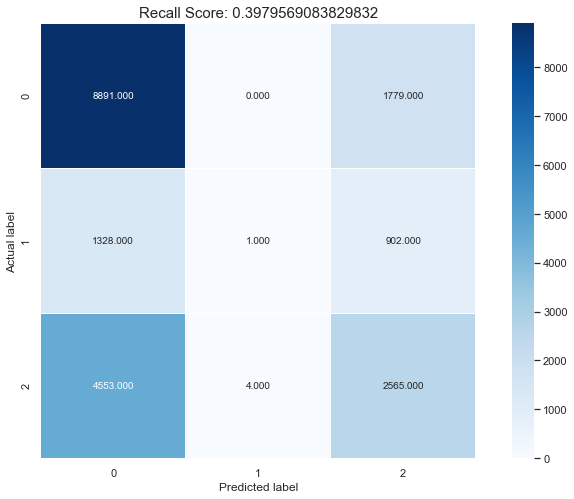

In [288]:
get_model_performance(predictions, 'Blues', X_test, y_test_mc)

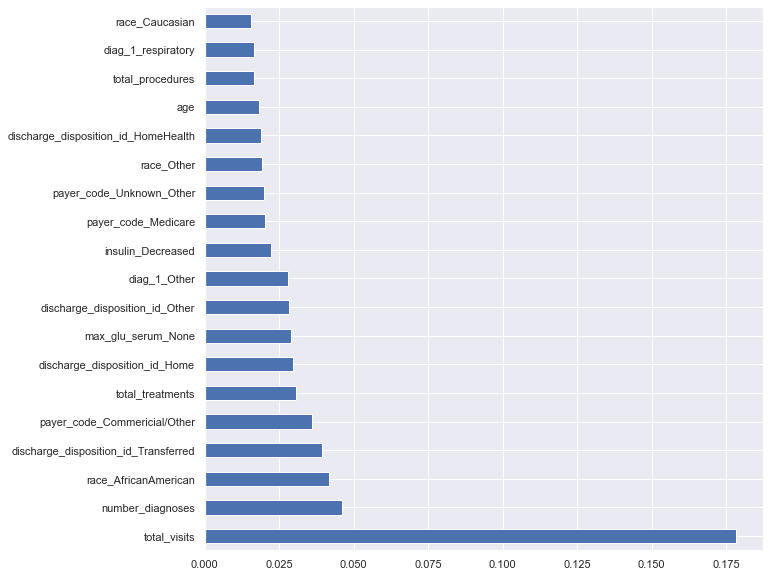

In [291]:
get_important_feats(xgb, X_train)

In [292]:
xgb_feats_no_sm = ['total_visits', 'number_diagnoses', 'race_African_American',
        'discharge_disposition_id_Transferred', 'discharge_disposition_id_Home',
                  'total_treatments', 'max_glu_serum_None', 
            'payer_code_Commericial/Other', 
                  'discharge_disposition_id_Other', 'diag_1_other']

In [295]:
predictions, score = model_test(knn, X_train, y_train_mc, X_test, y_test_mc)

Confusion Matrix: 
 [[8014  349 2307]
 [1391  166  674]
 [4593  424 2105]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.57      0.75      0.65     10670
     < 30 days       0.18      0.07      0.10      2231
     > 30 days       0.41      0.30      0.34      7122

      accuracy                           0.51     20023
     macro avg       0.39      0.37      0.37     20023
  weighted avg       0.47      0.51      0.48     20023
 

True Negative: 8014
False Positive: 349
False Negative: 1391
True Positive: 166 

Precision score: 0.38772513793867974
Recall score: 0.37368230940034697
F1 score : 0.3664454518914551
Accuracy score: 0.5136592918144134


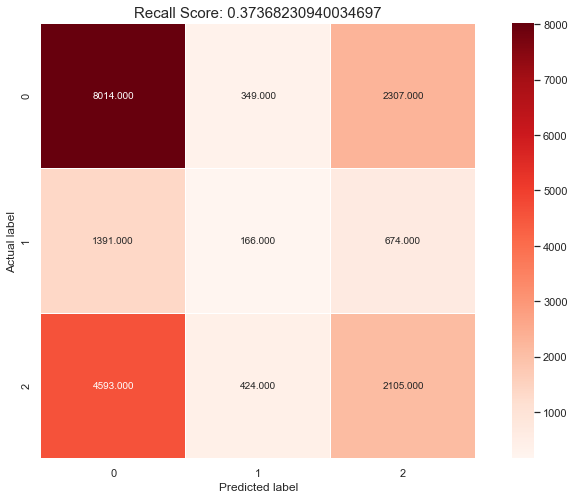

In [296]:
get_model_performance(predictions, 'Reds', X_test, y_test_mc)

In [248]:
# get_important_feats(knn, X_train)

In [298]:
predictions, score = model_test(forest, X_train, y_train_mc, X_test, y_test_mc)

Confusion Matrix: 
 [[8770   23 1877]
 [1402   27  802]
 [4697   35 2390]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.59      0.82      0.69     10670
     < 30 days       0.32      0.01      0.02      2231
     > 30 days       0.47      0.34      0.39      7122

      accuracy                           0.56     20023
     macro avg       0.46      0.39      0.37     20023
  weighted avg       0.52      0.56      0.51     20023
 

True Negative: 8770
False Positive: 23
False Negative: 1402
True Positive: 27 

Precision score: 0.4596527305450036
Recall score: 0.38987091209527835
F1 score : 0.3674004459320173
Accuracy score: 0.5587074863906507


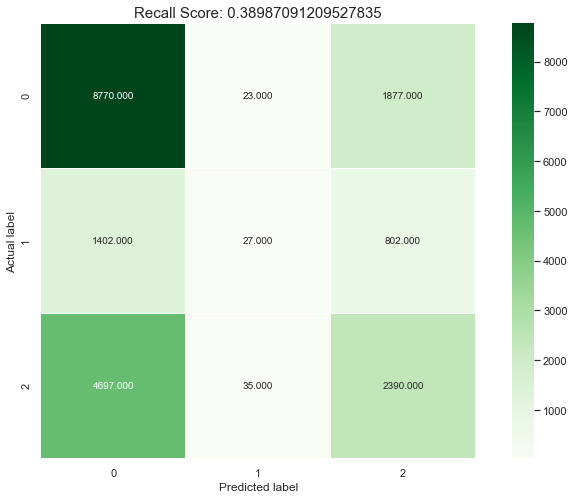

In [299]:
get_model_performance(predictions, 'Greens', X_test, y_test_mc)

In [305]:
print(classification_report(y_test, predictions, 
                                target_names = ['Not Readmitted', '< 30 days',
                                                '> 30 days']))

                precision    recall  f1-score   support

Not Readmitted       0.60      0.79      0.68     10670
     < 30 days       0.23      0.02      0.04      2231
     > 30 days       0.46      0.37      0.41      7122

      accuracy                           0.55     20023
     macro avg       0.43      0.39      0.38     20023
  weighted avg       0.51      0.55      0.51     20023



In [297]:
# X_train_enc.nunique()

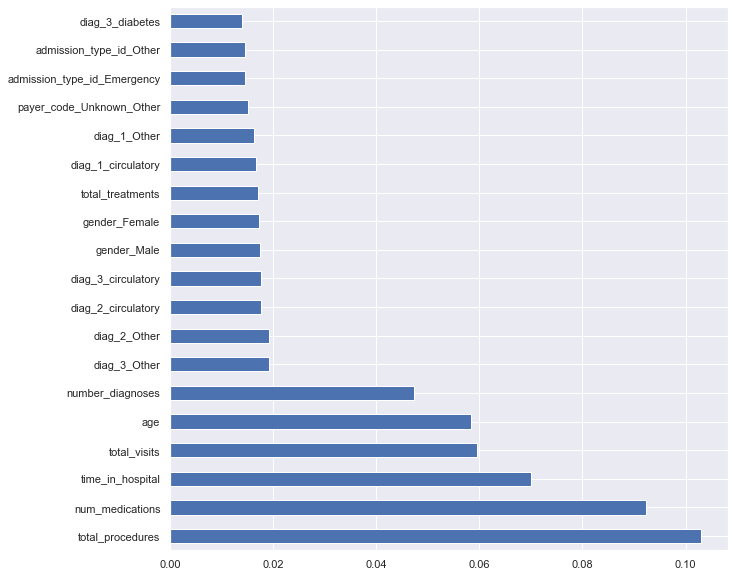

In [301]:
get_important_feats(forest, X_train)

In [302]:
forest_no_sm = ['total_procedures', 'num_medications', 'time_in_hospital', 
        'total_visits', 'age', 'number_diagnoses', 'diag_3_Other', 'diag_2_Other',
    'diag_2_circulatory',
              'diag_3_circulatory']
# diag_1 and diag_2 circulatory were the next two

In [303]:
predictions, score = model_test(decision, X_train, y_train_mc, X_test, y_test_mc)

Confusion Matrix: 
 [[5998 1173 3499]
 [1000  350  881]
 [3357 1001 2764]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.58      0.56      0.57     10670
     < 30 days       0.14      0.16      0.15      2231
     > 30 days       0.39      0.39      0.39      7122

      accuracy                           0.46     20023
     macro avg       0.37      0.37      0.37     20023
  weighted avg       0.46      0.46      0.46     20023
 

True Negative: 5998
False Positive: 1173
False Negative: 1000
True Positive: 350 

Precision score: 0.3682679865179514
Recall score: 0.3690367957344319
F1 score : 0.3684223535876901
Accuracy score: 0.4550766618388853


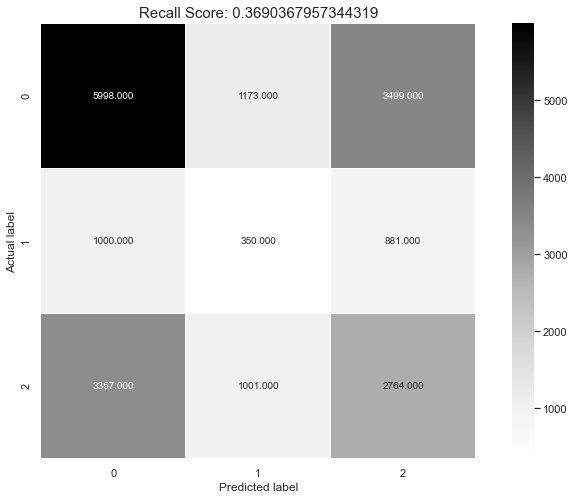

In [304]:
get_model_performance(predictions, 'Greys', X_test, y_test_mc)

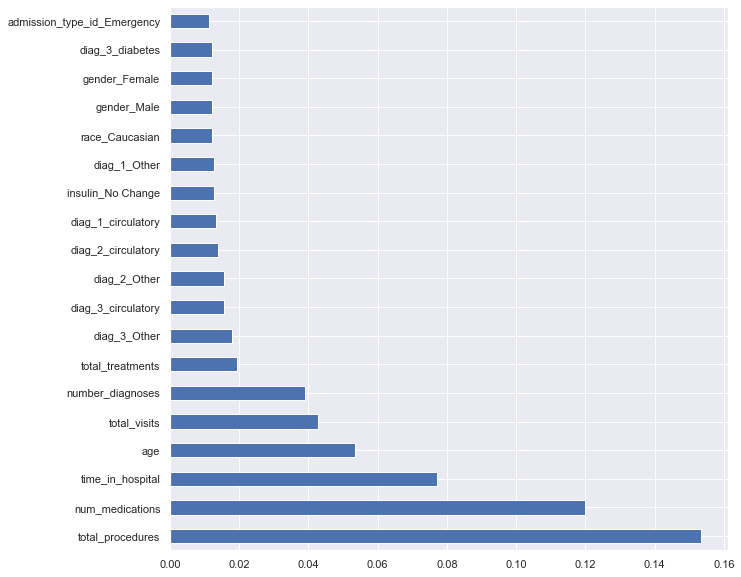

In [305]:
get_important_feats(decision, X_train)

In [306]:
decision_no_sm = ['total_procedures', 'num_medications', 'time_in_hospital', 
        'total_visits', 'age', 'number_diagnoses', 'total_treatments',
                  'diag_3_Other'
              'diag_3_circulatory', 'diag_2_Other']
# diag_1 and diag_2 circulatory were the next two
# these are very similar to decisionTree

In [307]:
predictions, score = model_test(gbc,  X_train, y_train_mc, X_test, y_test_mc)

Confusion Matrix: 
 [[8888    2 1780]
 [1329   10  892]
 [4544   15 2563]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.60      0.83      0.70     10670
     < 30 days       0.37      0.00      0.01      2231
     > 30 days       0.49      0.36      0.41      7122

      accuracy                           0.57     20023
     macro avg       0.49      0.40      0.37     20023
  weighted avg       0.54      0.57      0.52     20023
 

True Negative: 8888
False Positive: 2
False Negative: 1329
True Positive: 10 

Precision score: 0.4873623000976069
Recall score: 0.3991142694864133
F1 score : 0.37422414106814156
Accuracy score: 0.5723917494880887


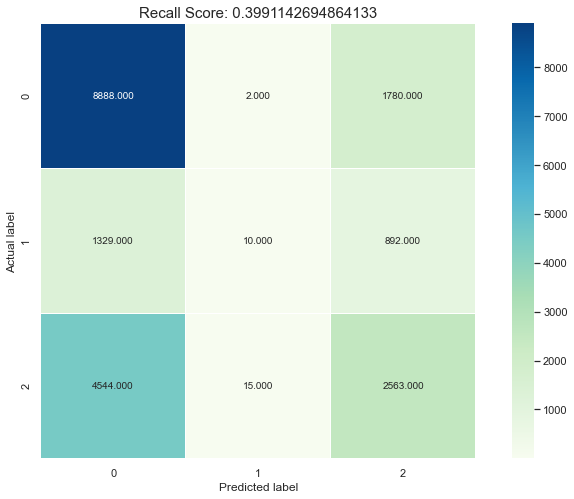

In [308]:
get_model_performance(predictions, 'GnBu', X_test, y_test_mc)

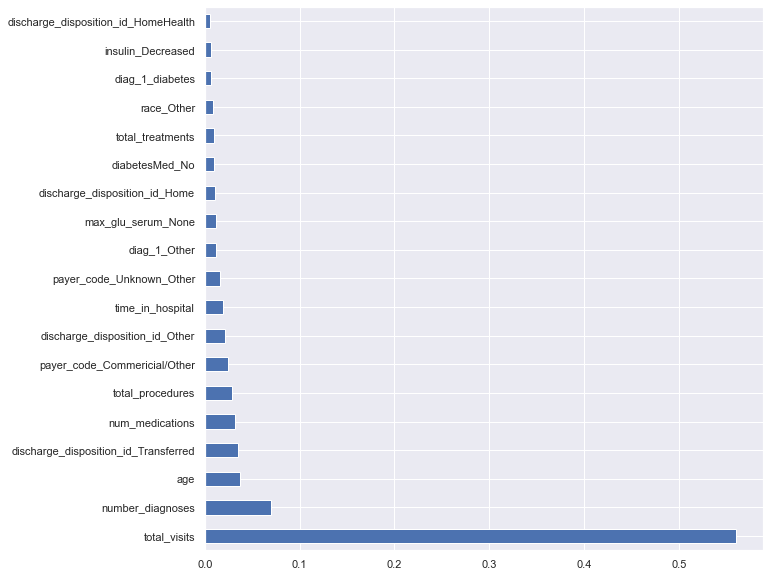

In [309]:
get_important_feats(gbc, X_train)

In [310]:
gbc_no_sm = ['total_visits', 'age', 'number_diagnoses', 'total_treatments',
                  'diag_3_Other', 'discharge_disposition_id_Transferred',
             'num_medications', 'total_procedures', 'payer_code_Commercial/Other',
              'time_in_hospital', 'payer_code_Unknown_Other' ]

 

### SMOTE for multi-class:

In [654]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [663]:
# for col, inx in enumerate(X_train.columns):
#     print(inx, col)

In [662]:
cats_indx = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
                  37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
                    53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]

In [658]:
X_train.shape

(80088, 69)

In [681]:
smnc = SMOTENC(
    sampling_strategy='auto', # samples only the minority class
    random_state=0, 
    k_neighbors=5,
    n_jobs=4,
    categorical_features=cats_indx
)  

X_res, y_res = smnc.fit_resample(X_train, y_train_mc)

In [682]:
print(f'After OverSampling, the shape of train_X: {X_res.shape}') 
print(f'After OverSampling, the shape of train_y: {y_res.shape} \n') 
 
print(f'After OverSampling, counts of label 2 : {sum(y_res == 2)}')     
print(f'After OverSampling, counts of label 1 : {sum(y_res == 1)}') 
print(f'After OverSampling, counts of label 0 : {sum(y_res == 0)}') 

After OverSampling, the shape of train_X: (127617, 69)
After OverSampling, the shape of train_y: (127617,) 

After OverSampling, counts of label 2 : 42539
After OverSampling, counts of label 1 : 42539
After OverSampling, counts of label 0 : 42539


### Run models with SMOTE data:

In [687]:
predictions, score = model_test(xgb, X_res, y_res, X_test, y_test_mc)

Confusion Matrix: 
 [[7713  773 2184]
 [1065  399  767]
 [3610  880 2632]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.62      0.72      0.67     10670
     < 30 days       0.19      0.18      0.19      2231
     > 30 days       0.47      0.37      0.41      7122

      accuracy                           0.54     20023
     macro avg       0.43      0.42      0.42     20023
  weighted avg       0.52      0.54      0.52     20023
 

True Negative: 7713
False Positive: 773
False Negative: 1065
True Positive: 399 

Precision score: 0.42949807929454903
Recall score: 0.42375684477042497
F1 score : 0.4232172191042616
Accuracy score: 0.5365829296309245


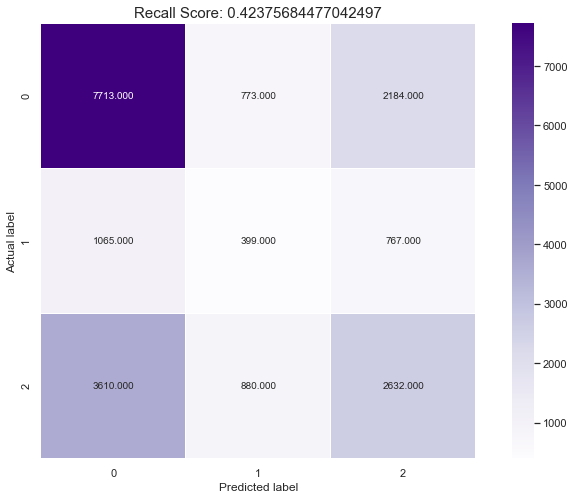

In [688]:
get_model_performance(predictions, 'Purples', X_test, y_test_mc)

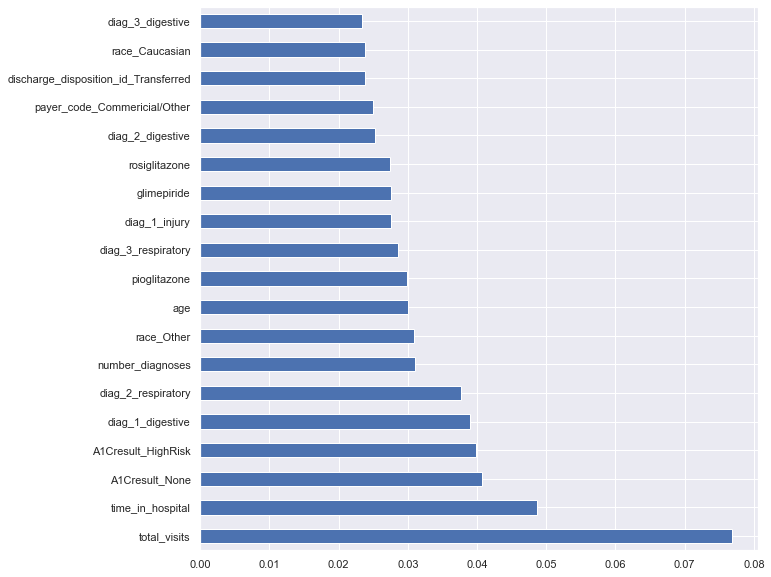

In [689]:
get_important_feats(xgb, X_res)

In [690]:
predictions, score = model_test(gbc, X_res, y_res, X_test, y_test_mc)

Confusion Matrix: 
 [[7800  588 2282]
 [1075  322  834]
 [3603  689 2830]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.63      0.73      0.67     10670
     < 30 days       0.20      0.14      0.17      2231
     > 30 days       0.48      0.40      0.43      7122

      accuracy                           0.55     20023
     macro avg       0.43      0.42      0.43     20023
  weighted avg       0.52      0.55      0.53     20023
 

True Negative: 7800
False Positive: 588
False Negative: 1075
True Positive: 322 

Precision score: 0.43414208495237583
Recall score: 0.4242372482412781
F1 score : 0.42506319889917554
Accuracy score: 0.5469709833691255


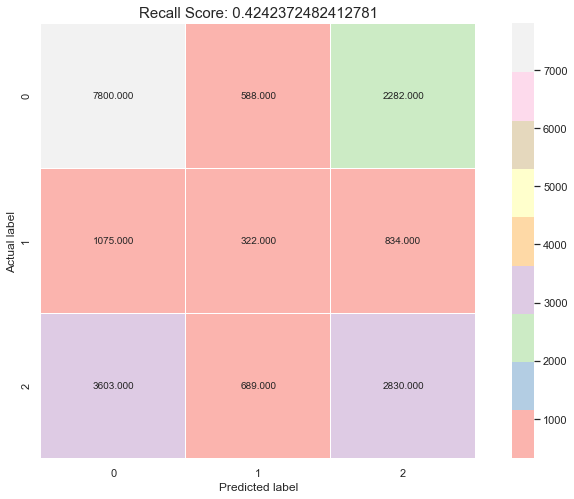

In [691]:
get_model_performance(predictions, 'Pastel1', X_test, y_test_mc)

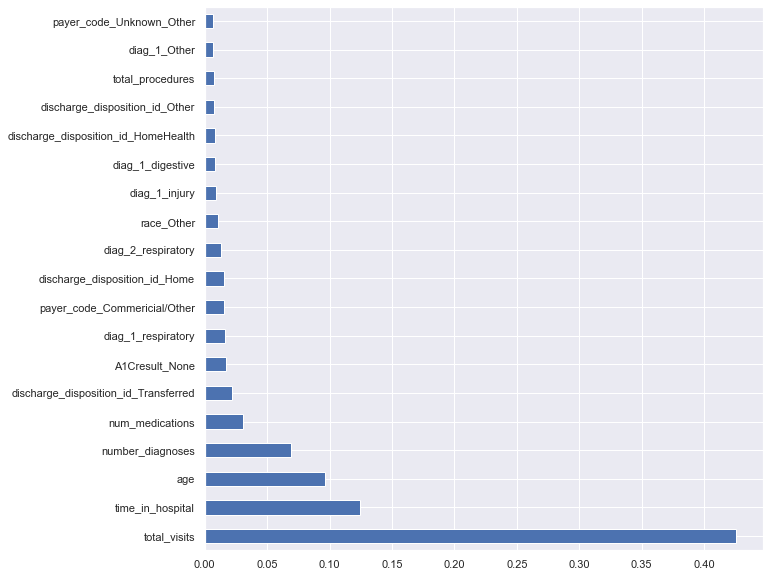

In [692]:
get_important_feats(gbc, X_res)

Confusion Matrix: 
 [[7759  328 2583]
 [1100  184  947]
 [3737  345 3040]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.62      0.73      0.67     10670
     < 30 days       0.21      0.08      0.12      2231
     > 30 days       0.46      0.43      0.44      7122

      accuracy                           0.55     20023
     macro avg       0.43      0.41      0.41     20023
  weighted avg       0.52      0.55      0.53     20023
 

True Negative: 7759
False Positive: 328
False Negative: 1100
True Positive: 184 

Precision score: 0.43113364598568554
Recall score: 0.4121665416092153
F1 score : 0.41006925632765223
Accuracy score: 0.5485192029166459


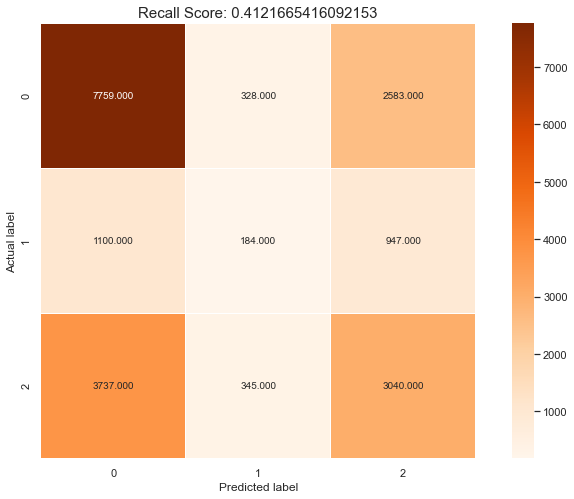

In [693]:
predictions, score = model_test(forest, X_res, y_res, X_test, y_test_mc)
get_model_performance(predictions, 'Oranges', X_test, y_test_mc)

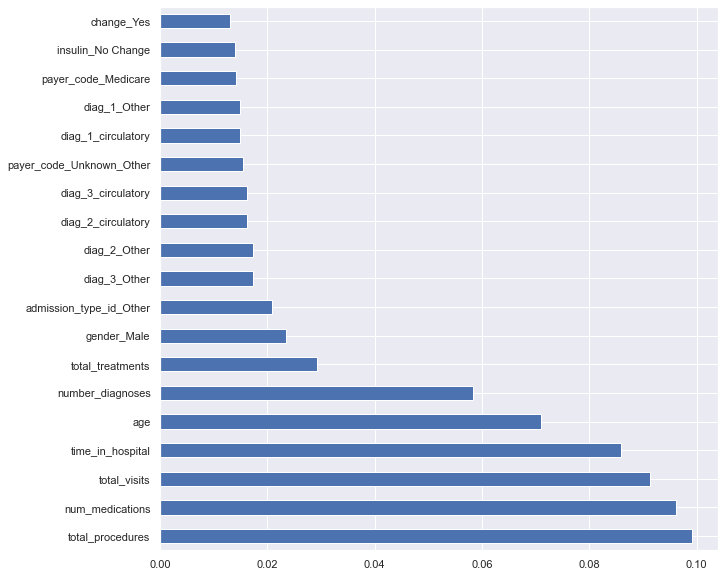

In [694]:
get_important_feats(forest, X_res)

Confusion Matrix: 
 [[5761 1385 3524]
 [ 994  401  836]
 [3297 1100 2725]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.57      0.54      0.56     10670
     < 30 days       0.14      0.18      0.16      2231
     > 30 days       0.38      0.38      0.38      7122

      accuracy                           0.44     20023
     macro avg       0.37      0.37      0.37     20023
  weighted avg       0.46      0.44      0.45     20023
 

True Negative: 5761
False Positive: 1385
False Negative: 994
True Positive: 401 

Precision score: 0.365560600240266
Recall score: 0.36742743089053426
F1 score : 0.3654578608194295
Accuracy score: 0.4438395844778505


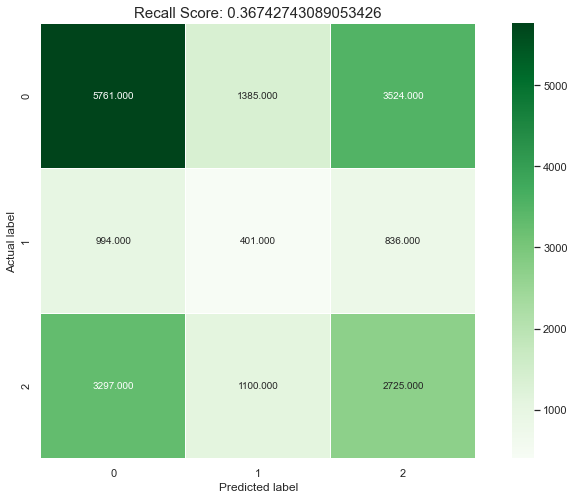

In [695]:
predictions, score = model_test(decision, X_res, y_res, X_test, y_test_mc)
get_model_performance(predictions, 'Greens', X_test, y_test_mc)

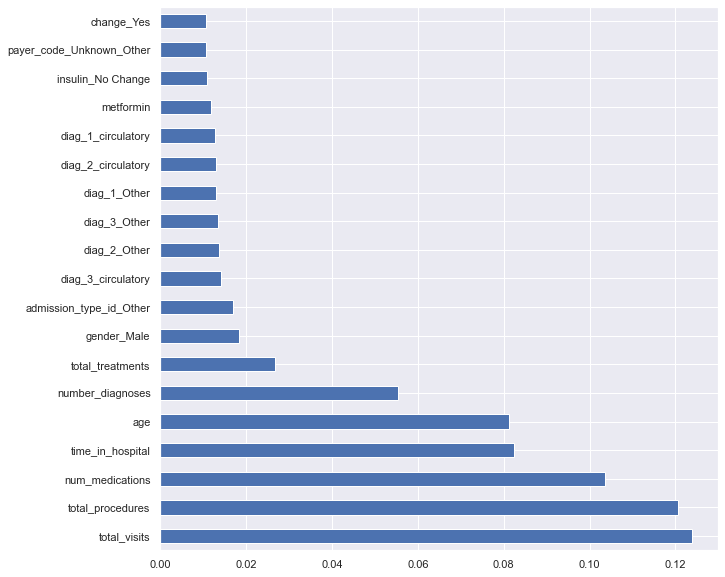

In [696]:
get_important_feats(decision, X_res)

### Bagging Classifier:

In [202]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [203]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=xgb, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In [204]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))
print(bc.score(X_train, y_train), bc.score(X_test, y_test))

Test set accuracy of bc: 0.62
0.6505559604127976 0.6223343155371323


### Manual parameter searches:

In [270]:
def best_model (model, parameter_grid):
    def grid_search(X_train, y_train, clf, param_grid, k):
        modelos=GridSearchCV(clf, 
                       param_grid=param_grid, 
                       cv=k,
                       return_train_score=True)
        modelos=modelos.fit(X_train,y_train)
        return modelos

    param_grid = parameter_grid

    clf = model
    gsearch = grid_search(X_train, y_train, clf, param_grid, k=3)

    print(f'Best hyperparameters:\n {gsearch.best_params_}')
    print(f'Best score (validation): {gsearch.best_score_}')

In [271]:
def model_performance(model_prediction):
    cfm = confusion_matrix(y_test, model_prediction)

    true_negative = cfm[0][0]
    false_positive = cfm[0][1]
    false_negative = cfm[1][0]
    true_positive = cfm[1][1]

    Precision=round(precision_score(y_test, model_prediction, average='macro'),3)
    Recall=round(recall_score(y_test, model_prediction, average='macro'),3)
    F_1=round(f1_score(y_test, model_prediction, average='macro'),3)
    
    print('Confusion Matrix: \n', cfm, '\n')

    print('True Negative:', true_negative)
    print('False Positive:', false_positive)
    print('False Negative:', false_negative)
    print('True Positive:', true_positive,'\n')
    
    print ('Precision: {}'.format(Precision) )
    print ('Recall: {}'.format(Recall))
    print ('F_1: {}'.format(F_1))

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [208]:
logistic_model = LogisticRegression(max_iter=10000, random_state=0)
logistic_parameter_grid = {'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']}
best_model(logistic_model, logistic_parameter_grid)

Best hyperparameters:
 {'solver': 'lbfgs'}
Best score (validation): 0.6135193393960732


In [209]:
classifier = LogisticRegression(solver='lbfgs', max_iter=10000,random_state=0) 
classifier.fit(X_train, y_train)
over_logistic_prediction = classifier.predict(X_test)
model_performance(over_logistic_prediction)

Confusion Matrix: 
 [[7087 3583]
 [4160 5193]] 

True Negative: 7087
False Positive: 3583
False Negative: 4160
True Positive: 5193 

Precision: 0.611
Recall: 0.61
F_1: 0.61


This was .41 with multi-class target and SMOTE.

In [210]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_parameter_grid = {"max_depth": range(5, 60), "criterion": ["gini", "entropy"],}
best_model (tree_model, tree_parameter_grid)

Best hyperparameters:
 {'criterion': 'gini', 'max_depth': 7}
Best score (validation): 0.618432519513187


In [211]:
tree_model = DecisionTreeClassifier(max_depth=7, criterion='gini', random_state=42) 
tree_model.fit(X_train, y_train)
pred_tree=tree_model.predict(X_test) 
model_performance(pred_tree)

Confusion Matrix: 
 [[7363 3307]
 [4380 4973]] 

True Negative: 7363
False Positive: 3307
False Negative: 4380
True Positive: 4973 

Precision: 0.614
Recall: 0.611
F_1: 0.611


This was with multi-class target and gini criterion/max-depth=14
- Precision: 0.427
- Recall: 0.408
- F_1: 0.407

In [237]:
from yellowbrick.model_selection import FeatureImportances

In [242]:
# plt.figure(figsize=(10,15))
# viz = FeatureImportances(tree_model)
# viz.fit(X_train, y_train)
# viz.show()
# plt.show()

In [213]:
# random_forest_model = RandomForestClassifier(random_state=0)
# random_forest_param_grid = {"criterion": ["gini", "entropy"],
#              "max_depth": range(5, 40)} #estaba en 60
# best_model(random_forest_model, random_forest_param_grid)


In [215]:
# clf=RandomForestClassifier(criterion='gini', max_depth=36,random_state=0)
# clf.fit(X_train,y_train)
# random_forest_pred = clf.predict(X_test)
# model_performance(random_forest_pred)

With {'criterion': 'gini', 'max_depth': 36} recall was .40

Confusion Matrix: 
 [[8257   89 2324]
 [1236   85  910]
 [4155  129 2838]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.60      0.77      0.68     10670
     < 30 days       0.28      0.04      0.07      2231
     > 30 days       0.47      0.40      0.43      7122

      accuracy                           0.56     20023
     macro avg       0.45      0.40      0.39     20023
  weighted avg       0.52      0.56      0.52     20023
 

True Negative: 8257
False Positive: 89
False Negative: 1236
True Positive: 85 

Precision score: 0.4509721421069168
Recall score: 0.4034783334174958
F1 score : 0.3921228676863602
Accuracy score: 0.5583578884283075


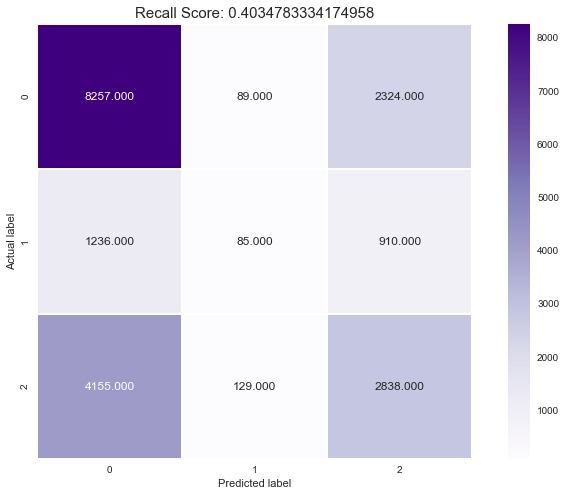

In [248]:
get_model_performance(random_forest_pred, 'Purples')

In [ ]:
knn_model = KNeighborsClassifier()
knn_parameter_grid = {'n_neighbors':[2,5, 10, 50]}
best_model (knn_model, knn_parameter_grid)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train, y_train)
knn_prediction = classifier.predict(X_test)
model_performance(knn_prediction)


In [273]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [274]:
# Loop over different values of neighbors
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

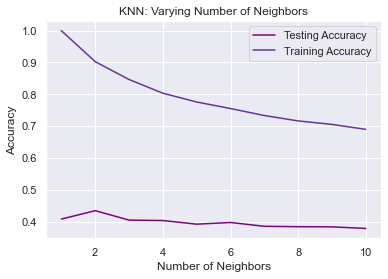

In [275]:
# Generate plot
# plt.fig(figsize=(13, 8))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color='purple')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color='rebeccapurple')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## Binary target baseline models:

In [372]:
xgb = XGBClassifier()
decision = DecisionTreeClassifier(class_weight='balanced')
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier()
forest = RandomForestClassifier(class_weight='balanced')

In [558]:
# X_train.head()

Confusion Matrix: 
 [[7655 3015]
 [4541 4812]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.63      0.72      0.67     10670
    Readmitted       0.61      0.51      0.56      9353

      accuracy                           0.62     20023
     macro avg       0.62      0.62      0.61     20023
  weighted avg       0.62      0.62      0.62     20023
 

True Negative: 7655
False Positive: 3015
False Negative: 4541
True Positive: 4812 

Precision score: 0.6212298743620395
Recall score: 0.615959691375981
F1 score : 0.6148696556452244
Accuracy score: 0.6226339709334265


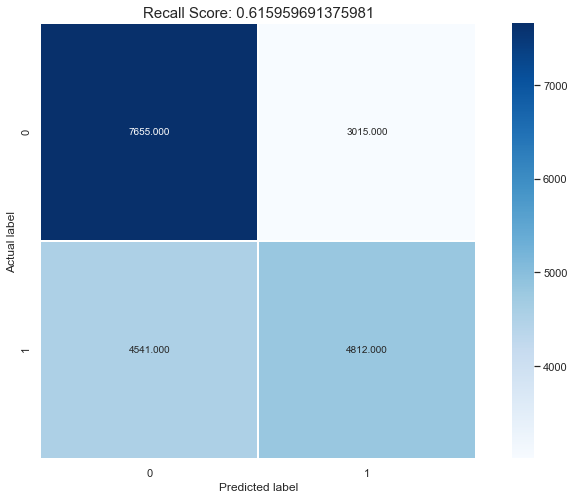

In [559]:
predictions, score = model_test(xgb, X_train, y_train_bi, X_test, y_test_bi)
get_model_performance(predictions, 'Blues', X_test, y_test_bi)

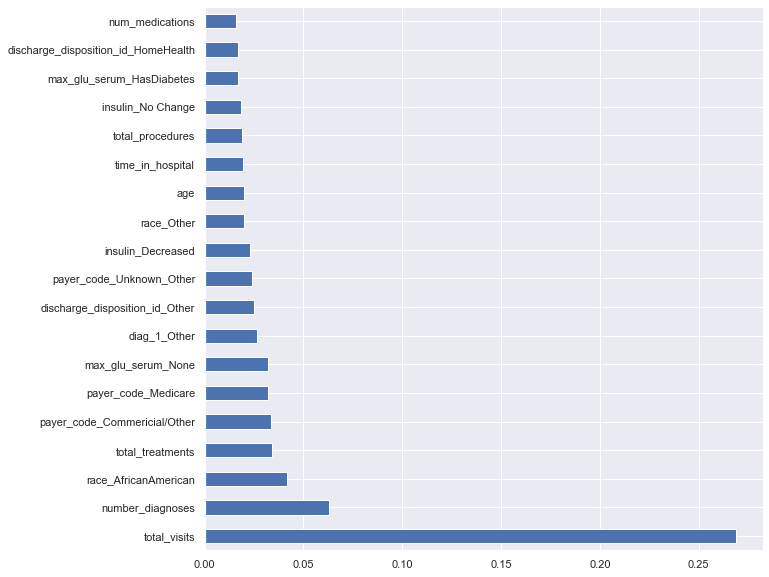

In [560]:
get_important_feats(xgb, X_train)

Confusion Matrix: 
 [[6081 4589]
 [4504 4849]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.57      0.57      0.57     10670
    Readmitted       0.51      0.52      0.52      9353

      accuracy                           0.55     20023
     macro avg       0.54      0.54      0.54     20023
  weighted avg       0.55      0.55      0.55     20023
 

True Negative: 6081
False Positive: 4589
False Negative: 4504
True Positive: 4849 

Precision score: 0.5441331553175071
Recall score: 0.5441794657949461
F1 score : 0.5441464548919368
Accuracy score: 0.5458722469160465


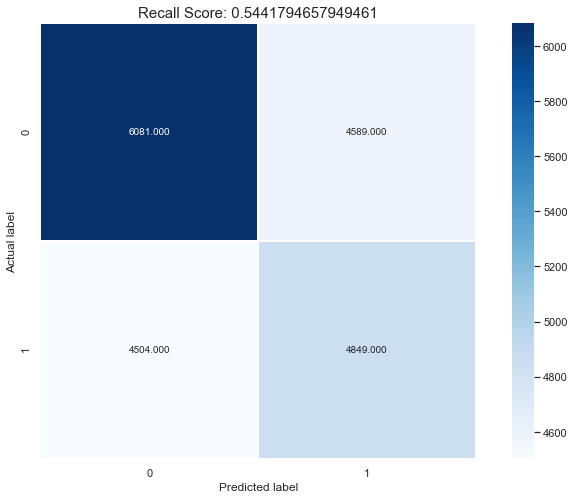

In [561]:
predictions, score = model_test(decision, X_train, y_train_bi, X_test, y_test_bi)
get_model_performance(predictions, 'Blues', X_test, y_test_bi)

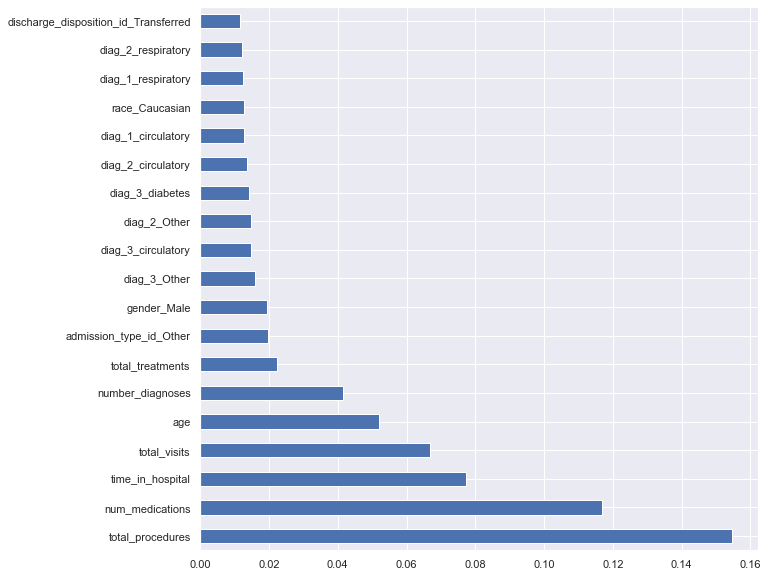

In [562]:
get_important_feats(decision, X_train)

Confusion Matrix: 
 [[7697 2973]
 [4560 4793]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.63      0.72      0.67     10670
    Readmitted       0.62      0.51      0.56      9353

      accuracy                           0.62     20023
     macro avg       0.62      0.62      0.62     20023
  weighted avg       0.62      0.62      0.62     20023
 

True Negative: 7697
False Positive: 2973
False Negative: 4560
True Positive: 4793 

Precision score: 0.6225725660273786
Recall score: 0.6169121094515229
F1 score : 0.6156990200597898
Accuracy score: 0.6237826499525546


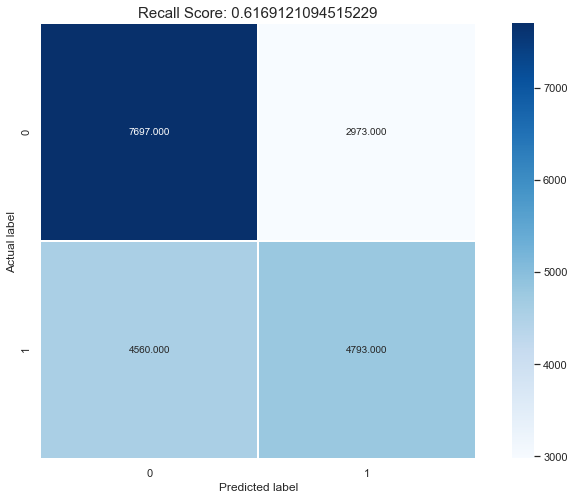

In [563]:
predictions, score = model_test(gbc, X_train, y_train_bi, X_test, y_test_bi)
get_model_performance(predictions, 'Blues', X_test, y_test_bi)

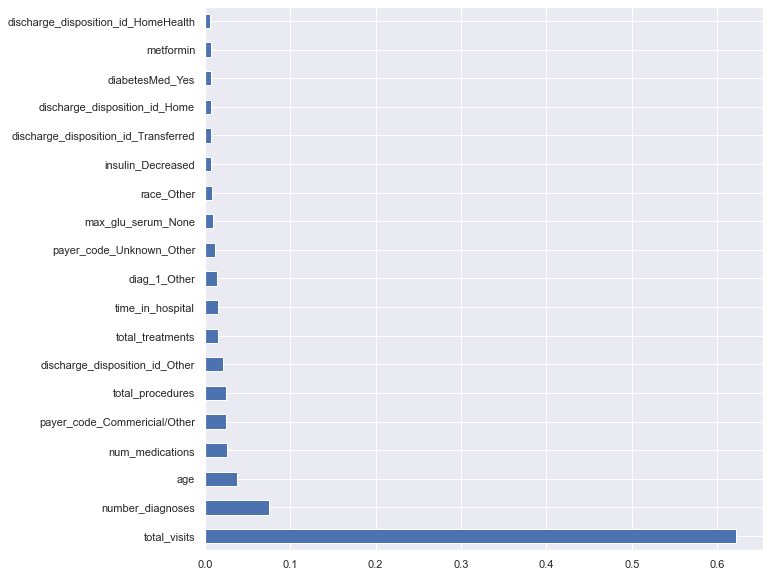

In [564]:
get_important_feats(gbc, X_train)

Confusion Matrix: 
 [[6656 4014]
 [4637 4716]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.59      0.62      0.61     10670
    Readmitted       0.54      0.50      0.52      9353

      accuracy                           0.57     20023
     macro avg       0.56      0.56      0.56     20023
  weighted avg       0.57      0.57      0.57     20023
 

True Negative: 6656
False Positive: 4014
False Negative: 4637
True Positive: 4716 

Precision score: 0.5647989220582772
Recall score: 0.5640141523987161
F1 score : 0.5638525722410348
Accuracy score: 0.5679468611097238


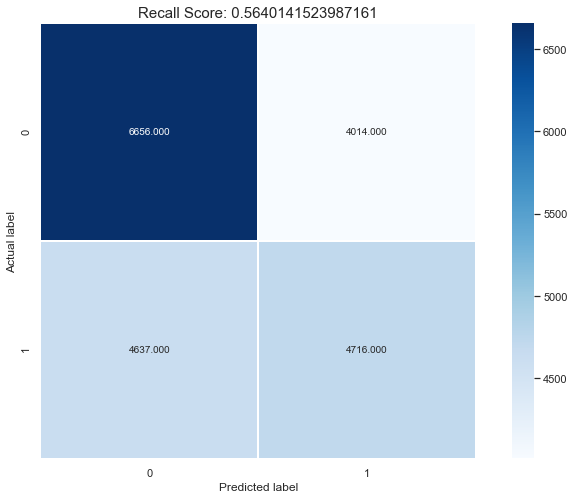

In [391]:
predictions, score = model_test(knn, X_train, y_train_bi, X_test, y_test_bi)
get_model_performance(predictions, 'Blues', X_test, y_test_bi)

In [396]:
# get_important_feats(knn, X_train)

Confusion Matrix: 
 [[7425 3245]
 [4472 4881]] 

Classification Report: 
                 precision    recall  f1-score   support

Not Readmitted       0.62      0.70      0.66     10670
    Readmitted       0.60      0.52      0.56      9353

      accuracy                           0.61     20023
     macro avg       0.61      0.61      0.61     20023
  weighted avg       0.61      0.61      0.61     20023
 

True Negative: 7425
False Positive: 3245
False Negative: 4472
True Positive: 4881 

Precision score: 0.6123857256531061
Recall score: 0.6088704655102668
F1 score : 0.6082696357849602
Accuracy score: 0.6145932177995306


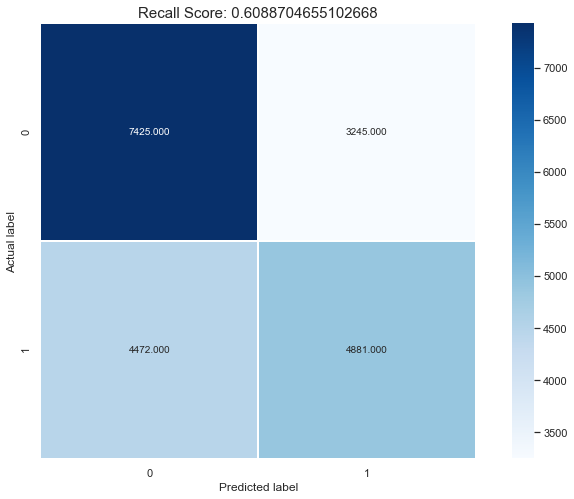

In [565]:
predictions, score = model_test(forest, X_train, y_train_bi, X_test, y_test_bi)
get_model_performance(predictions, 'Blues', X_test, y_test_bi)

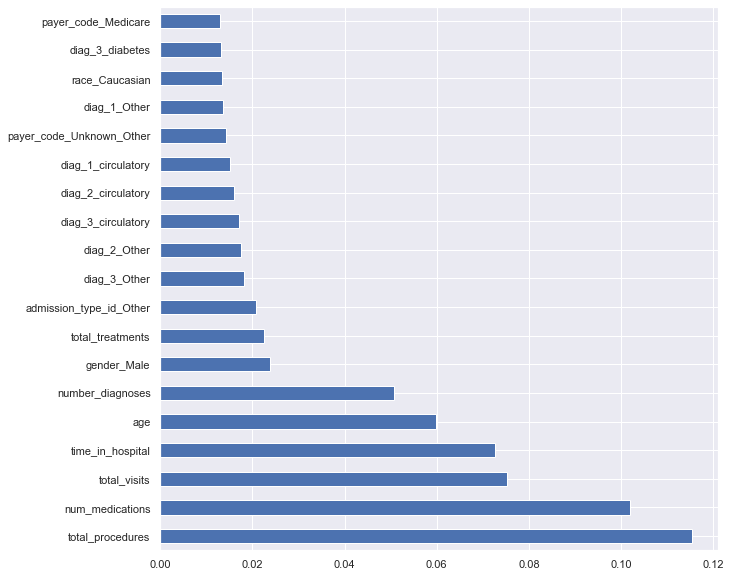

In [566]:
get_important_feats(forest, X_train)

## GridSearch/RandomSearch:

In [645]:
X_train.head()
# df.columns

age  time_in_hospital  num_medications  number_diagnoses  metformin  \
0 -0.051043          3.227674         5.317452          0.820820  -0.499188   
1 -2.558958          0.539380         0.620161          0.820820  -0.499188   
2 -0.051043          1.883527        -0.492356          0.303993   2.003252   
3 -1.305000         -1.140804         0.002096          0.820820  -0.499188   
4 -0.051043         -0.804767        -0.245130          0.303993   2.003252   

   repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  ...  \
0    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
1    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
2    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
3    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   
4    -0.125045    -0.083838       -0.029577    -0.233268      -0.003534  ...   

   max_glu_serum_Norm  A1Cresult_HighRisk  A1Cresult_None  A1Cresult_Norm  \
0                 0.0                 0.0             1.0             0.0   
1                 0.0                 0.0             1.0             0.0   
2                 0.0                 0.0             1.0             0.0   
3                 0.0                 0.0             1.0             0.0   
4                 0.0                 0.0             1.0             0.0   

   insulin_Decreased  insulin_Increased  insulin_No Change  insulin_None  \
0                0.0                1.0                0.0           0.0   
1                0.0                1.0                0.0           0.0   
2                0.0                0.0                0.0           1.0   
3                0.0                0.0                1.0           0.0   
4                0.0                0.0                0.0           1.0   

   change_Yes  diabetesMed_Yes  
0         1.0              1.0  
1         1.0              1.0  
2         0.0              1.0  
3         1.0              1.0  
4         0.0              1.0  

[5 rows x 69 columns]

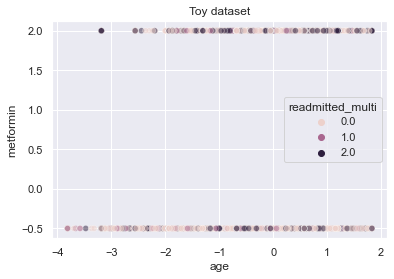

In [697]:
sns.scatterplot(
    data=X_res, x='age', y="metformin", hue=y_train_mc, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [719]:
from nested_cv import NestedCV

In [723]:

param_grid = {
      "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
       
}

NCV = NestedCV(model = XGBClassifier(objective='multi:softmax', num_class=3), 
               params_grid=param_grid, 
               outer_kfolds=5, inner_kfolds=5,
               cv_options={'metric':recall_score, 
                           'metric_score_indicator_lower':False,
                           'randomized_search_iter':30, 
                           'predict_proba':False,
                           'multiclass_average': 'micro'})
NCV.fit(X=X_res,y=y_res)

NCV.outer_scores

KeyboardInterrupt: 

In [728]:
# Create XGB Classifier object
xgb_clf = XGBClassifier(objective='multi:softmax', num_class=3,
                           eval_metric = ["logloss", "auc"])
                        
                           
# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500, 1000]}

scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score)}

# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, 
                              scoring = scoring, refit = 'Recall',
                             cv = 7, verbose = 3, random_state = 42,
                     return_train_score=True)

# Fit the model
model_xgboost = xgb_rscv.fit(X_res, y_res)
print(model_xgboost.best_score_)
print(model_xgboost.best_params_)

Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV] subsample=0.6, reg_lambda=1.5, reg_alpha=0, n_estimators=500, min_child_weight=5, max_depth=4, learning_rate=0.01, gamma=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: multiclass format is not supported

In [729]:
def search_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, 
                    scoring_fit='neg_mean_squared_error',
                       do_probabilities = False, 
                    search_mode = 'GridSearchCV', 
                    n_iterations = 0):
    fitted_model = None
    
    if(search_mode == 'GridSearchCV'):
        gs = GridSearchCV(
            estimator=model,
            param_grid=param_grid, 
            cv=cv, 
            n_jobs=-1, 
            scoring=scoring_fit,
            verbose=2
        )
        fitted_model = gs.fit(X_train_data, y_train_data)

    elif (search_mode == 'RandomizedSearchCV'):
        rs = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid, 
            cv=cv,
            n_iter=n_iterations,
            n_jobs=-1, 
            scoring=scoring_fit,
            verbose=2
        )
        fitted_model = rs.fit(X_train_data, y_train_data)
    
    
    if(fitted_model != None):
        if do_probabilities:
            pred = fitted_model.predict_proba(X_test_data)
        else:
            pred = fitted_model.predict(X_test_data)
            
        return fitted_model, pred

In [ ]:
model = XGBClassifier(objective='multi:softprob',  
    num_class=3)
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200],
       
}

model, pred = search_pipeline(X_res, X_test, y_res, y_test_mc, model, 
                                 param_grid, cv=5, scoring_fit='recall_macro',
                                 search_mode = 'RandomizedSearchCV', 
                              n_iterations = 15)

print(model.best_score_)
print(model.best_params_)



# objective='multi:softmax', num_class=3, booster='gbtree', 
#                     eval_metric = ["logloss", "auc"]

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


## Dummy Classifier:

In [ ]:
 from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_res, y_res)
DummyClassifier(strategy='stratified', random_state=42) # is default 
dummy_clf.predict(X_test)

dummy_clf.score(X_test, y_test_mc)

In [628]:
from sklearn.model_selection import RandomizedSearchCV
MOD = RandomForestClassifier() 
#Implemente RandomSearchCV
m_params = { 
            
                    "n_estimators" : np.linspace(2, 500, 500, dtype = "int"),  
                    "max_depth": [5, 20, 30, None], 
                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    
            }
scoreFunction = {"recall": "recall", "precision": "precision"}
random_search = RandomizedSearchCV(MOD,
                                       param_distributions = m_params, 
                                       n_iter = 20,
                                       scoring = scoreFunction,               
                                       refit = "recall",
                                       return_train_score=True,
                                       random_state = 42,
                                       cv = 5)
#                                         verbose = 1 + int(log)) 

    #trains and optimizes the model
random_search.fit(X_train, y_train_bi)
# try: 
#     for i in range(random_search): 
#           print(random_search[i]) 
# except KeyError: 
#     print("ERROR") 

    #recover the best model
MOD = random_search.best_estimator_

KeyboardInterrupt: 

In [620]:
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib


# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train_bi)
dtest = xgb.DMatrix(X_test, label=y_test_bi)

In [614]:
# dtrain

In [621]:
# use svmlight file for xgboost
dump_svmlight_file(X_train, y_train_bi, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test_bi, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[18:30:01] 80088x69 matrix with 3057186 entries loaded from dtrain.svm
[18:30:01] 20023x69 matrix with 764000 entries loaded from dtest.svm


In [622]:
# X_train

In [623]:
# set xgboost params
# param = {
#     'max_depth': 3,  # the maximum depth of each tree
#     'eta': 0.3,  # the training step for each iteration
#     'silent': 1,  # logging mode - quiet
#     'objective': 'multi:softprob',  # error evaluation for multiclass training
#     'num_class': 3}  # the number of classes that exist in this datset
# num_round = 20  # the number of training iterations

param = {
    'eta': 0.3, 
    'max_depth': 3,  
#     'objective': 'multi:softprob',  
    'num_class': 2} 

steps = 20  # The number of training iterations

In [624]:
model = xgb.train(param, dtrain, steps)

In [626]:
# import numpy as np
# from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(dtest)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test_bi, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test_bi, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_bi, best_preds)))

Precision = 0.2664435898716476
Recall = 0.5
Accuracy = 0.5328871797432952
